# Importing the packages

In [1]:
import ml_models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
path = '/Users/sahilchhillar/Documents/Dissertation/Images'

files = ml_models.import_images(path)

print(len(files))

1601


In [3]:
files.sort()

files = files[1:len(files)]

len(files)

1600

In [4]:
labels = []

for file in files:
    labels.append(int(file[0]))
    
labels = np.array(labels)
labels.shape

(1600,)

In [5]:
image_data = ml_models.convert_to_array(files, path)
image_data.shape

(1600, 1021125)

In [47]:
x_train, x_test, y_train, y_test = ml_models.split_data(image_data, labels)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1280, 1021125) (1280,) (320, 1021125) (320,)


# Machine learning model and Deep Learning with no Data Augmentation

RandomForest Classifier 

In [3]:
from random_forest_models import *

In [8]:
random_forest_raw = random_forest_raw_train(x_train, y_train)

Best parameters are: {'bootstrap': False, 'n_estimators': 150}
Best score for the parameter is: 0.8382812500000001


In [9]:
y_pred_rf_raw = random_forest_test(random_forest_raw, x_test)

In [10]:
conf_mat_rf_raw = confusion_matrix(y_test, y_pred_rf_raw)
conf_mat_rf_raw

array([[54,  0,  0,  0,  0,  0],
       [ 0, 42,  2,  1,  2,  0],
       [ 1,  1, 55,  3,  4,  0],
       [ 1,  0,  1, 42,  9,  0],
       [ 0,  0,  1,  5, 51,  0],
       [ 0,  0,  3,  1,  3, 38]])

In [11]:
score_rf_raw = accuracy_score(y_test, y_pred_rf_raw)
score_rf_raw

0.88125

In [12]:
report_rf_raw = classification_report(y_test, y_pred_rf_raw, output_dict=True)
df = pd.DataFrame(report_rf_raw)
df.to_csv('Model Reports/Random_Forest_Raw.csv')

df

1          2          3          4          5          6  \
precision   0.964286   0.976744   0.887097   0.807692   0.739130   1.000000   
recall      1.000000   0.893617   0.859375   0.792453   0.894737   0.844444   
f1-score    0.981818   0.933333   0.873016   0.800000   0.809524   0.915663   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision   0.88125    0.895825      0.889659  
recall      0.88125    0.880771      0.881250  
f1-score    0.88125    0.885559      0.882830  
support     0.88125  320.000000    320.000000

In [13]:
df = pd.DataFrame(data={
    "Model": "Random Forest",
    "Accuracy": score_rf_raw,
    "Type": "Raw"
}, index=[0])

df.to_csv('Accuracy.csv', index=False)

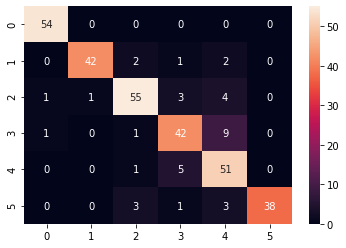

In [14]:
sns.heatmap(conf_mat_rf_raw, annot=True)
plt.savefig(fname='Model Images/random_forest_raw.png')
plt.show()

Gaussian Naive Bayes

In [4]:
from gaussian_nb_models import *

In [16]:
gaussian_nb_raw = gaussian_nb_raw_train(x_train, y_train)

Best parameters are: {'var_smoothing': 1e-09}
Best score for the parameter is: 0.49140625


In [17]:
y_pred_gnn_raw = gaussian_nb_test(gaussian_nb_raw, x_test)

In [18]:
conf_mat_gnb_raw = confusion_matrix(y_test, y_pred_gnn_raw)
conf_mat_gnb_raw

array([[46,  0,  1,  4,  3,  0],
       [ 1, 16,  8,  0, 14,  8],
       [ 2, 17, 17,  2, 15, 11],
       [ 8,  7,  7, 14, 12,  5],
       [ 2,  9,  3,  3, 27, 13],
       [ 0,  1,  1,  1,  6, 36]])

In [19]:
score_gnb_raw = accuracy_score(y_test, y_pred_gnn_raw)
score_gnb_raw

0.4875

In [20]:
report_gnb_raw = classification_report(y_test, y_pred_gnn_raw, output_dict=True)
df = pd.DataFrame(report_gnb_raw)
df.to_csv('Model Reports/GaussianNB_Raw.csv')

df

1          2          3          4          5          6  \
precision   0.779661   0.320000   0.459459   0.583333   0.350649   0.493151   
recall      0.851852   0.340426   0.265625   0.264151   0.473684   0.800000   
f1-score    0.814159   0.329897   0.336634   0.363636   0.402985   0.610169   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision    0.4875    0.497709      0.498883  
recall       0.4875    0.499290      0.487500  
f1-score     0.4875    0.476247      0.470984  
support      0.4875  320.000000    320.000000

In [21]:
df = pd.read_csv('Accuracy.csv')
gnn = pd.DataFrame(data={
    "Model": "Gaussian Naive Bayes",
    "Accuracy": score_gnb_raw,
    "Type": "Raw"
}, index=[0])

df = df.append(gnn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy Type
0         Random Forest   0.88125  Raw
1  Gaussian Naive Bayes   0.48750  Raw


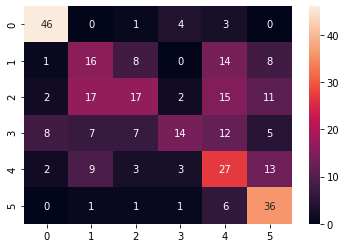

In [22]:
sns.heatmap(conf_mat_gnb_raw, annot=True)
plt.savefig(fname='Model Images/gaussian_nb_raw.png')
plt.show()

KNN Classifier

In [5]:
from knn_models import *

In [24]:
knn_raw = knn_raw_train(x_train, y_train)

Best parameters are: {'n_neighbors': 5}
Best score for the parameter is: 0.79609375


In [25]:
y_pred_knn_raw = knn_test(knn_raw, x_test)

In [26]:
conf_mat_knn_raw = confusion_matrix(y_test, y_pred_knn_raw)
conf_mat_knn_raw

array([[53,  1,  0,  0,  0,  0],
       [ 0, 41,  1,  2,  3,  0],
       [ 1,  2, 53,  2,  6,  0],
       [ 0,  5,  2, 39,  7,  0],
       [ 0,  7,  4,  7, 39,  0],
       [ 0,  1,  3,  1,  5, 35]])

In [27]:
score_knn_raw = accuracy_score(y_test, y_pred_knn_raw)
score_knn_raw

0.8125

In [28]:
report_knn_raw = classification_report(y_test, y_pred_knn_raw, output_dict=True)
df = pd.DataFrame(report_knn_raw)
df.to_csv('Model Reports/KNN_Raw.csv')

df

1          2          3          4          5          6  \
precision   0.981481   0.719298   0.841270   0.764706   0.650000   1.000000   
recall      0.981481   0.872340   0.828125   0.735849   0.684211   0.777778   
f1-score    0.981481   0.788462   0.834646   0.750000   0.666667   0.875000   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision    0.8125    0.826126      0.822587  
recall       0.8125    0.813297      0.812500  
f1-score     0.8125    0.816043      0.814375  
support      0.8125  320.000000    320.000000

In [29]:
df = pd.read_csv('Accuracy.csv')
knn = pd.DataFrame(data={
    "Model": "KNN",
    "Accuracy": score_knn_raw,
    "Type": "Raw"
}, index=[0])

df = df.append(knn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy Type
0         Random Forest   0.88125  Raw
1  Gaussian Naive Bayes   0.48750  Raw
2                   KNN   0.81250  Raw


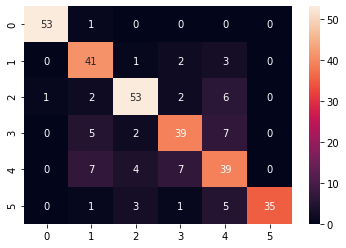

In [30]:
sns.heatmap(conf_mat_knn_raw, annot=True)
plt.savefig(fname='Model Images/knn_raw.png')
plt.show()

# Neural Network Architecture

In [5]:
from cnn import *

import time

#Deep learning package
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode


#Visualisation packages and decomposition packages
import umap
import umap.plot
from sklearn.manifold import TSNE

In [6]:
human_image_dataset = create_dataset(files, labels)

In [7]:
train_raw, valid_raw, test_raw = split_data_cnn(human_image_dataset)

In [8]:
BATCH_SIZE = 32
train_dataloader, valid_dataloader, test_dataloader = dataloader(train_raw, valid_raw, test_raw)

Training sample size:  1024 Validation dataset size:  256 Test sample size:  320


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

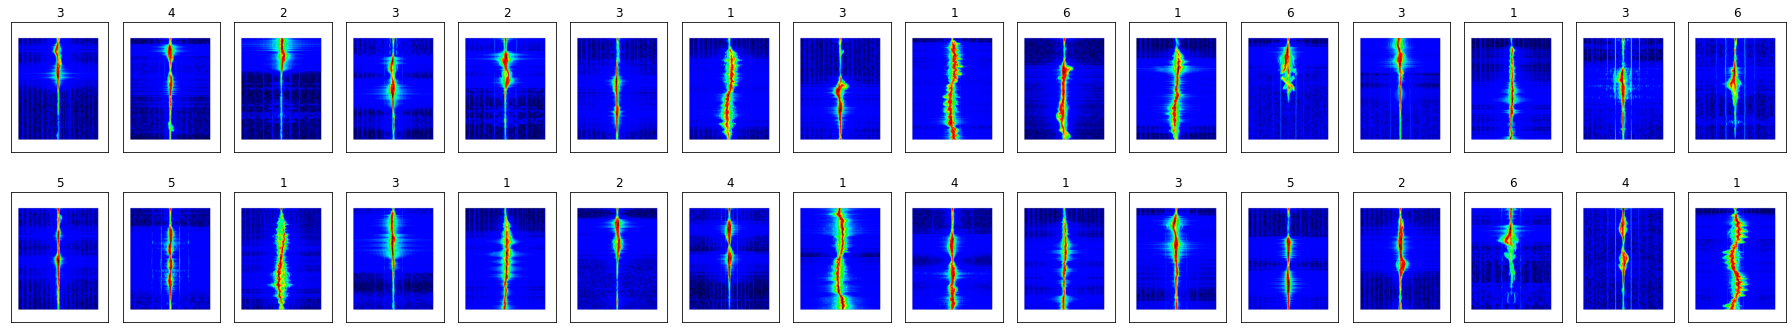

In [9]:
imgs, lbs = iter(train_dataloader).next()
imgs, lbs = np.asarray(imgs), np.asarray(lbs)

fig = plt.figure(figsize=(25,5))
for i in range(BATCH_SIZE):
    ax = fig.add_subplot(2, 16, i+1, xticks=[], yticks=[])
    ax.imshow(imgs[i].transpose(2,1,0).squeeze())
    ax.set_title(lbs[i])

plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

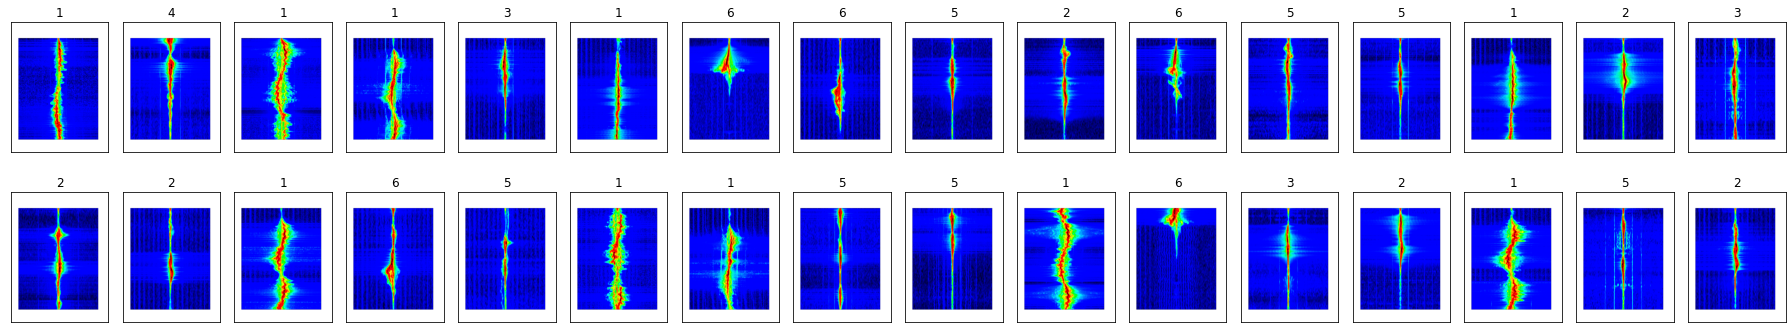

In [10]:
imgs, lbs = iter(valid_dataloader).next()
imgs, lbs = np.asarray(imgs), np.asarray(lbs)

fig = plt.figure(figsize=(25,5))
for i in range(BATCH_SIZE):
    ax = fig.add_subplot(2, 16, i+1, xticks=[], yticks=[])
    ax.imshow(imgs[i].transpose(2,1,0).squeeze())
    ax.set_title(lbs[i])

plt.tight_layout()

# Training the model

In [11]:
def train_model(model, dataloader_train, dataloader_valid, optimizer, criterion, n_epochs, num):
    training_loss, validation_loss, training_acc, validation_acc = [], [], [], []
    
    for epoch in range(1, n_epochs+1):
        start = time.time()

        train_loss = 0
        valid_loss = 0
        
        correct_pred_train = 0
        total_items_train = 0

        model.train()

        for img, lbl in dataloader_train:
            img = Variable(img)
            lbl = Variable(lbl)

            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, lbl)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred_train += torch.sum(pred).item()
            total_items_train += pred.shape[0]
            
        train_loss /= len(dataloader_train.dataset)
        training_loss.append(train_loss)
        training_acc.append(correct_pred_train/total_items_train*100)
            

            
        model.eval()
        
        correct_pred = 0
        total_items = 0

        for img, lbl in dataloader_valid:
            img = Variable(img)
            lbl = Variable(lbl)
            output = model(img)
            loss = criterion(output, lbl)
            
            valid_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred += torch.sum(pred).item()
            total_items += pred.shape[0]
            
        valid_loss /= len(dataloader_valid.dataset)
        validation_loss.append(valid_loss)
        validation_acc.append(correct_pred/total_items*100)
        
        end = time.time()
        time_min, time_sec = epoch_duration(start, end)

        print(f'Epoch: {epoch} | Execution time: {time_min}min : {time_sec}sec')
        print(f'Training loss: {train_loss:.5f} | Validation loss: {valid_loss:.5f}')
        print(f'Training accuracy: {correct_pred_train/total_items_train*100:.2f} | Validation accuracy: {correct_pred/total_items*100:.2f}')
        print('\n')
        
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation loss')
    plt.savefig(fname=f'Model Images/cnn_loss_raw{num}.png')
    plt.show()

    plt.plot(training_acc)
    plt.plot(validation_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation accuracy')
    plt.savefig(fname=f'Model Images/cnn_acc_raw{num}.png')
    plt.show()

    return model

In [12]:
def show_images(image, title=''):
    image = image.permute(2,1,0).numpy()
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [13]:
def predictions(model, test_dataloader, num):
    label_pred = []
    classes = 7
    confusion_matrix = torch.zeros(classes, classes)
    result_vis = []
    label_vis = []

    with torch.no_grad():
        for img, lbl in test_dataloader:
            img = Variable(img)
            lbl = Variable(lbl)
            output = model(img)
            label_pred.append(output.argmax(dim=1).data.cpu().numpy())

            _, pred = torch.max(output,1)
            result_vis.extend(output.numpy())
            label_vis.extend(lbl.numpy())

            for i, j in zip(lbl.view(-1), pred.view(-1)):
                confusion_matrix[i,j] += 1

    label_pred = np.concatenate(label_pred)

    img, lbl = next(iter(test_dataloader))

    for image, label, pred in zip(img, lbl, label_pred):
        if label != pred:
            show_images(image, title=f'True label: {label}\nPredicted label: {pred}')
            
    #Creating the confusion matrix
    class_names = ['walking', 'sitting', 'standing', 'picking up object', 'drinking', 'falling']

    df = pd.DataFrame(confusion_matrix[1:, 1:], index=class_names, columns=class_names, dtype=int)

    sns.heatmap(df, annot=True)
    plt.savefig(fname=f'CNN Models/conf_mat{num}.png')
    plt.show()
    score = confusion_matrix.diagonal().sum()/confusion_matrix.sum()*100
    print(f'Testing accuracy: {score:.2f}%')
    
    #UMAP Visualisation
    result = np.array(result_vis)
    lbls = np.array(label_vis)

    umap_obj = umap.UMAP().fit(result)
    umap.plot.points(umap_obj, labels=lbls)
    plt.savefig(fname=f'CNN Models/umap_raw{num}.png')
    plt.show()
    
    #TSNE Visualisation
    tsne = TSNE(n_components=2, perplexity=30)
    tsne_map = tsne.fit_transform(result)
    tsne_map.shape

    fig, ax = plt.subplots(figsize=(10,10))
    classes = 6

    for i in range(classes):
        index = np.in1d(lbls, i)
        ax.scatter(tsne_map[index,0], tsne_map[index,1], label=class_names[i], alpha=0.7)

    ax.legend(fontsize='large')
    plt.savefig(fname=f'CNN Models/tsne_raw{num}.png')
    plt.show()
    return score

CNN model 1

Epoch: 1 | Execution time: 8min : 35sec
Training loss: 1.59084 | Validation loss: 1.39209
Training accuracy: 34.08 | Validation accuracy: 51.56


Epoch: 2 | Execution time: 6min : 38sec
Training loss: 1.11405 | Validation loss: 0.85853
Training accuracy: 58.69 | Validation accuracy: 70.31


Epoch: 3 | Execution time: 5min : 30sec
Training loss: 0.83769 | Validation loss: 0.60487
Training accuracy: 68.75 | Validation accuracy: 81.25


Epoch: 4 | Execution time: 4min : 51sec
Training loss: 0.63277 | Validation loss: 0.53942
Training accuracy: 77.44 | Validation accuracy: 83.59


Epoch: 5 | Execution time: 4min : 57sec
Training loss: 0.42503 | Validation loss: 0.44066
Training accuracy: 86.04 | Validation accuracy: 84.38


Epoch: 6 | Execution time: 4min : 57sec
Training loss: 0.35022 | Validation loss: 0.38140
Training accuracy: 88.96 | Validation accuracy: 85.94


Epoch: 7 | Execution time: 4min : 52sec
Training loss: 0.36205 | Validation loss: 0.41483
Training accuracy: 87.40 | Validat

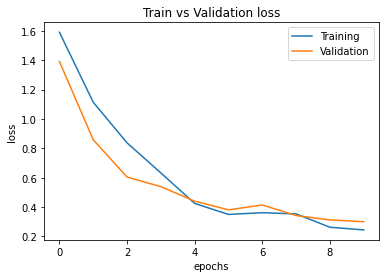

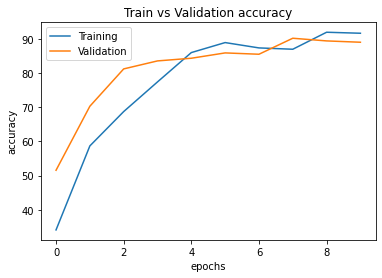

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


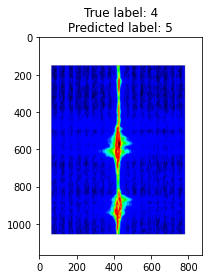

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


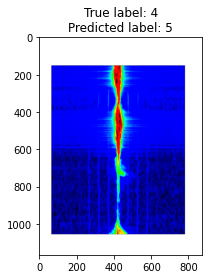

TypeError: savefig() missing 1 required positional argument: 'fname'

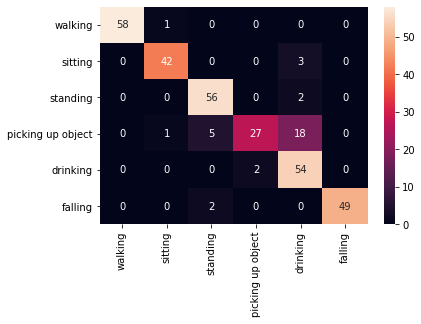

In [14]:
neuralNetwork1 = NeuralNetwork()
neuralNetwork2 = NeuralNetwork()
neuralNetwork3 = NeuralNetwork()
neuralNetwork4 = NeuralNetwork()

learning_rate = 0.001
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.SGD(neuralNetwork1.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_no_augmentation = train_model(model=neuralNetwork1, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


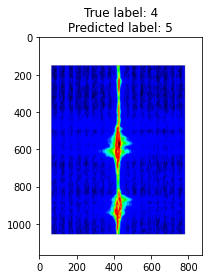

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


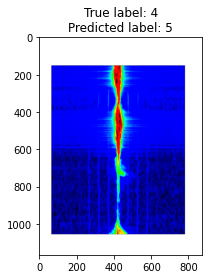

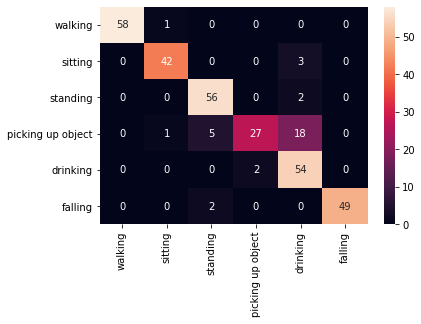

Testing accuracy: 89.38%


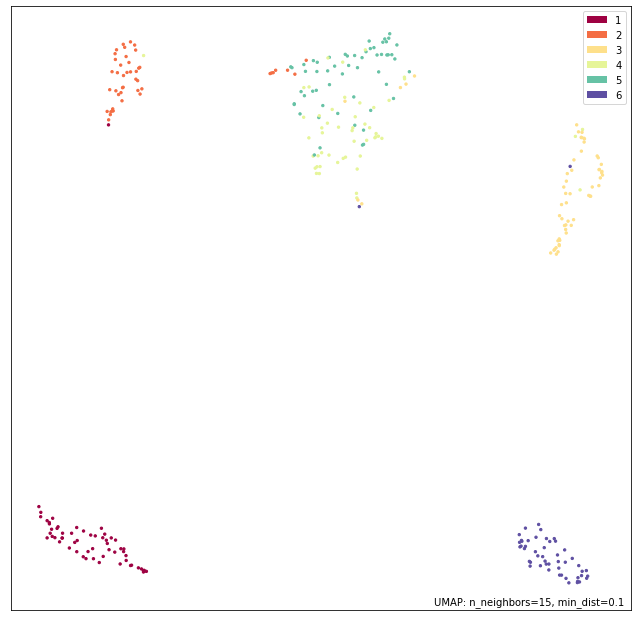

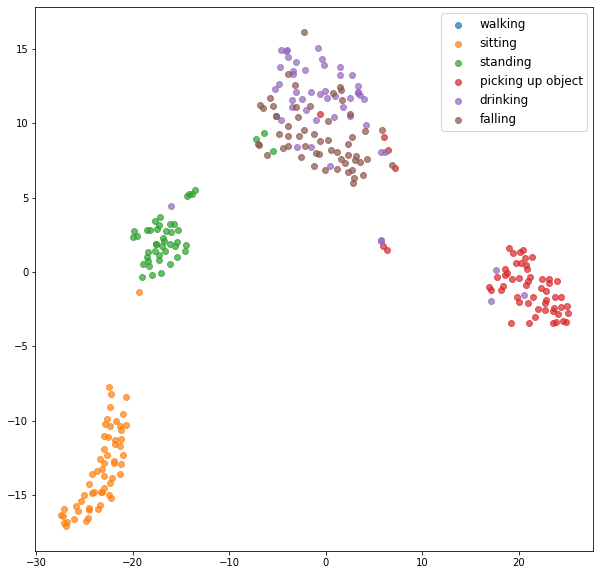

In [16]:
#Finding the accuracy of the model
scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=1)

In [18]:
scores_cnn_no_augmentation

tensor(89.3750)

In [19]:
df = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df.to_csv('CNN models.csv', index=False)

In [20]:
df

lr  weight decay optimizer loss function  accuracy type
0  0.001          0.05       SGD  CrossEntropy   0.89375  raw

In [21]:
torch.save(model_no_augmentation.state_dict(), "CNN Models/cnn_no_augmentation1.h5")

CNN model 2

Epoch: 1 | Execution time: 5min : 43sec
Training loss: 1.46938 | Validation loss: 1.06052
Training accuracy: 38.87 | Validation accuracy: 70.31


Epoch: 2 | Execution time: 5min : 2sec
Training loss: 0.87297 | Validation loss: 0.63360
Training accuracy: 66.41 | Validation accuracy: 77.73


Epoch: 3 | Execution time: 5min : 5sec
Training loss: 0.58849 | Validation loss: 0.55964
Training accuracy: 77.83 | Validation accuracy: 78.52


Epoch: 4 | Execution time: 5min : 16sec
Training loss: 0.46598 | Validation loss: 0.36481
Training accuracy: 83.50 | Validation accuracy: 89.06


Epoch: 5 | Execution time: 5min : 18sec
Training loss: 0.40746 | Validation loss: 0.45523
Training accuracy: 84.57 | Validation accuracy: 84.38


Epoch: 6 | Execution time: 5min : 5sec
Training loss: 0.30671 | Validation loss: 0.31614
Training accuracy: 89.75 | Validation accuracy: 88.28


Epoch: 7 | Execution time: 5min : 6sec
Training loss: 0.27118 | Validation loss: 0.34927
Training accuracy: 90.53 | Validation 

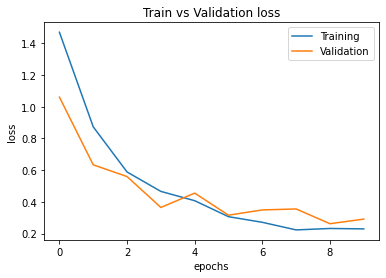

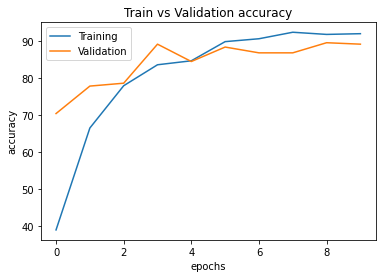

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


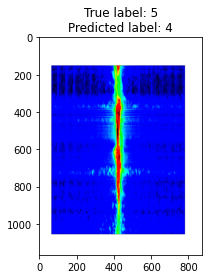

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


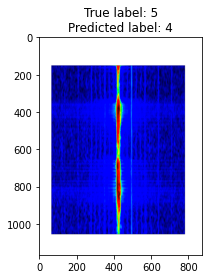

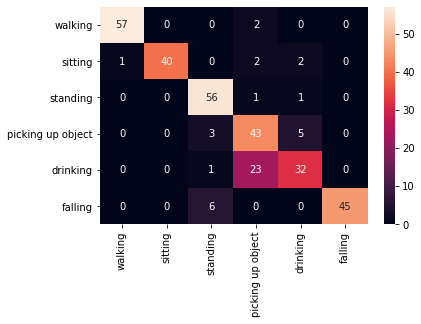

Testing accuracy: 85.31%


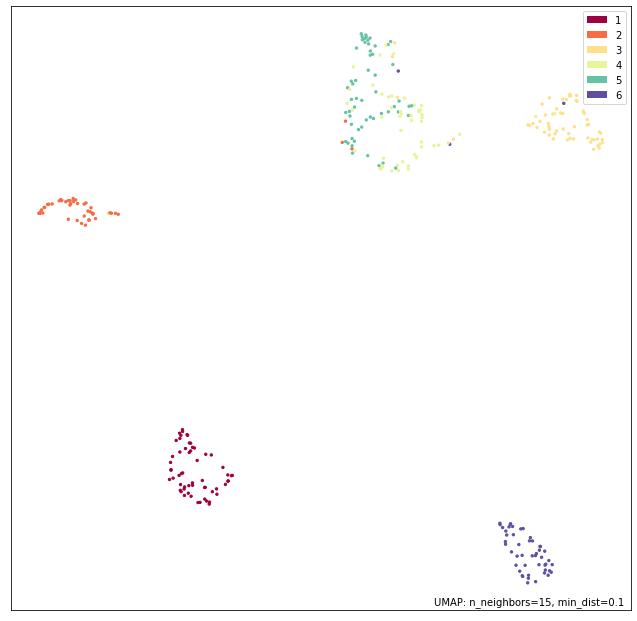

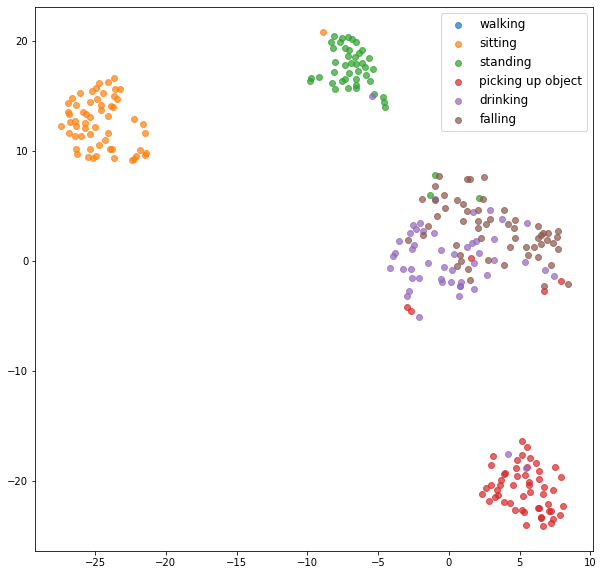

In [22]:
learning_rate = 0.002
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.SGD(neuralNetwork2.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_no_augmentation = train_model(model=neuralNetwork2, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=2)
        
#Finding the accuracy of the model
scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=2)

In [24]:
df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

      lr  weight decay optimizer loss function  accuracy type
0  0.001          0.05       SGD  CrossEntropy  0.893750  raw
1  0.002          0.05       SGD  CrossEntropy  0.853125  raw


In [25]:
torch.save(model_no_augmentation.state_dict(), "CNN Models/cnn_no_augmentation2.h5")

CNN Model 3

Epoch: 1 | Execution time: 8min : 2sec
Training loss: 13.70657 | Validation loss: 1.54202
Training accuracy: 22.85 | Validation accuracy: 33.98


Epoch: 2 | Execution time: 6min : 38sec
Training loss: 1.66234 | Validation loss: 1.24272
Training accuracy: 32.32 | Validation accuracy: 45.70


Epoch: 3 | Execution time: 6min : 17sec
Training loss: 1.36378 | Validation loss: 1.17590
Training accuracy: 45.90 | Validation accuracy: 52.34


Epoch: 4 | Execution time: 6min : 8sec
Training loss: 1.01252 | Validation loss: 0.69388
Training accuracy: 60.45 | Validation accuracy: 78.52


Epoch: 5 | Execution time: 5min : 48sec
Training loss: 0.78102 | Validation loss: 0.66981
Training accuracy: 69.82 | Validation accuracy: 75.78


Epoch: 6 | Execution time: 5min : 45sec
Training loss: 0.71897 | Validation loss: 0.65000
Training accuracy: 71.39 | Validation accuracy: 73.83


Epoch: 7 | Execution time: 5min : 37sec
Training loss: 0.56393 | Validation loss: 0.39346
Training accuracy: 79.20 | Validati

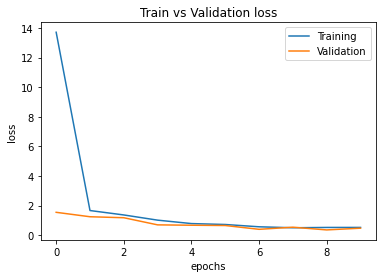

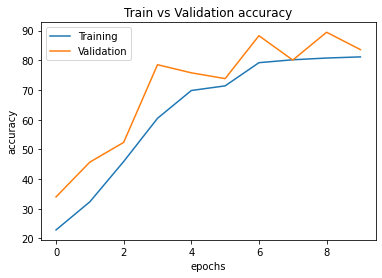

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


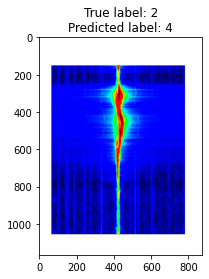

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


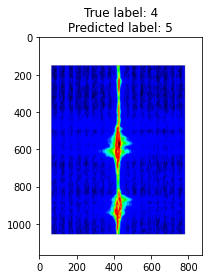

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


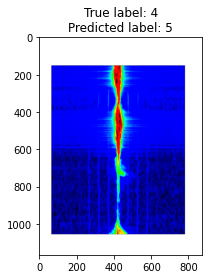

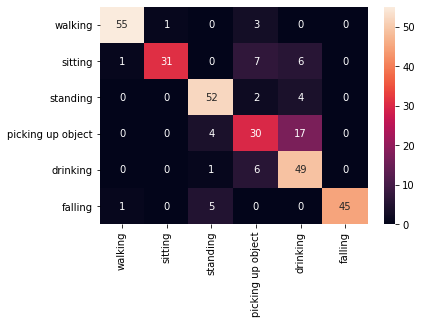

Testing accuracy: 81.88%


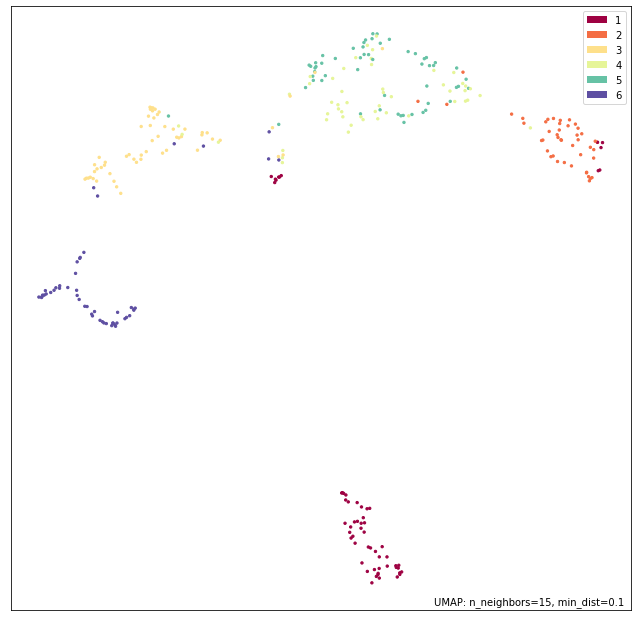

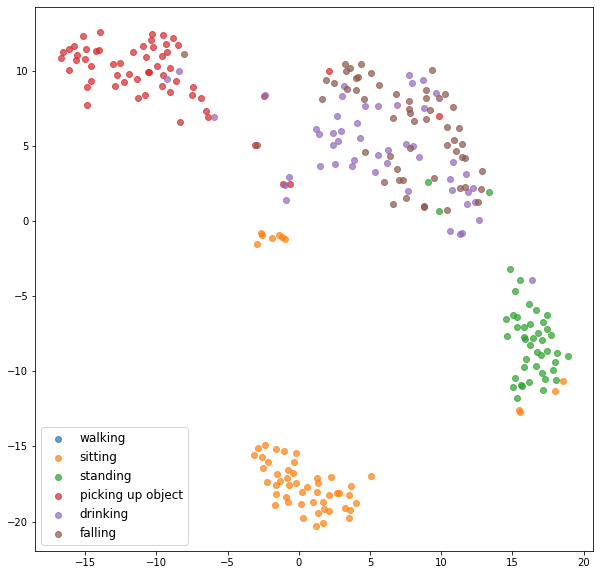

In [26]:
learning_rate = 0.001
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.Adam(neuralNetwork3.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_no_augmentation = train_model(model=neuralNetwork3, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=3)
        
#Finding the accuracy of the model
scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=3)

In [27]:
df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "Adam",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

      lr  weight decay optimizer loss function  accuracy type
0  0.001          0.05       SGD  CrossEntropy  0.893750  raw
1  0.002          0.05       SGD  CrossEntropy  0.853125  raw
2  0.001          0.05      Adam  CrossEntropy  0.818750  raw


In [28]:
torch.save(model_no_augmentation.state_dict(), "CNN Models/cnn_no_augmentation3.h5")

CNN Model 4

Epoch: 1 | Execution time: 6min : 5sec
Training loss: 25.50301 | Validation loss: 2.63997
Training accuracy: 19.53 | Validation accuracy: 16.41


Epoch: 2 | Execution time: 6min : 4sec
Training loss: 1.95319 | Validation loss: 1.89472
Training accuracy: 24.22 | Validation accuracy: 19.92


Epoch: 3 | Execution time: 5min : 57sec
Training loss: 1.80815 | Validation loss: 1.52948
Training accuracy: 25.49 | Validation accuracy: 32.03


Epoch: 4 | Execution time: 6min : 0sec
Training loss: 1.51873 | Validation loss: 1.72191
Training accuracy: 35.06 | Validation accuracy: 26.95


Epoch: 5 | Execution time: 6min : 45sec
Training loss: 1.55848 | Validation loss: 1.32870
Training accuracy: 32.13 | Validation accuracy: 39.84


Epoch: 6 | Execution time: 6min : 18sec
Training loss: 1.59553 | Validation loss: 1.41826
Training accuracy: 33.40 | Validation accuracy: 35.94


Epoch: 7 | Execution time: 6min : 34sec
Training loss: 1.44998 | Validation loss: 1.77015
Training accuracy: 36.72 | Validatio

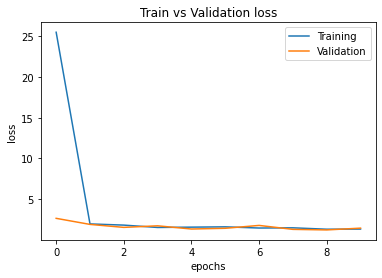

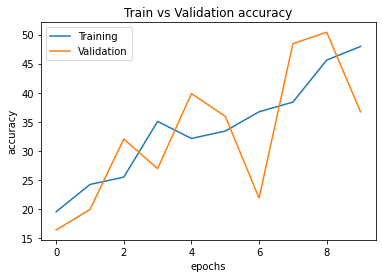

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


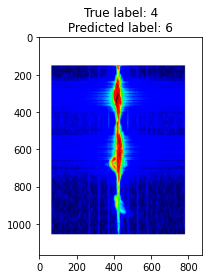

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


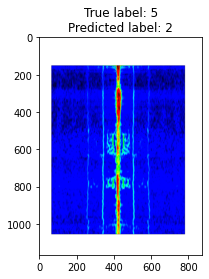

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


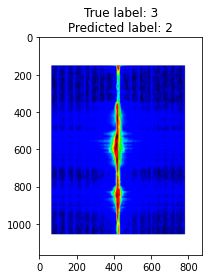

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


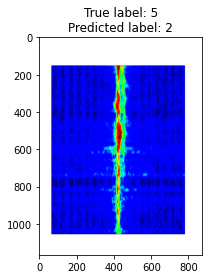

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


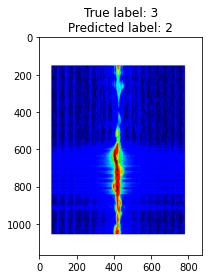

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


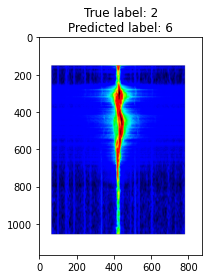

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


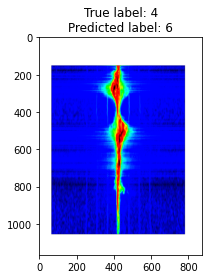

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


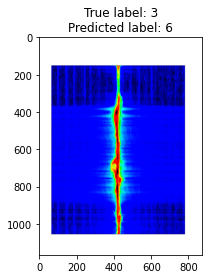

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


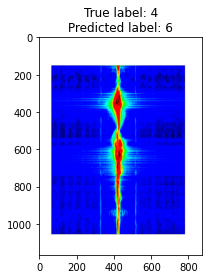

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


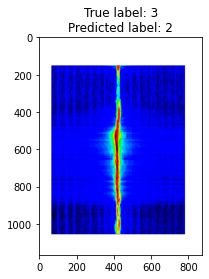

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


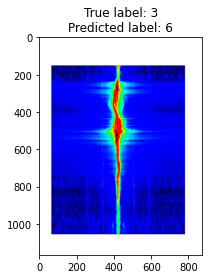

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


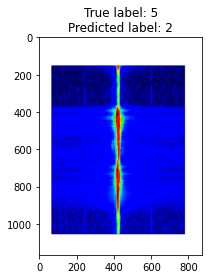

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


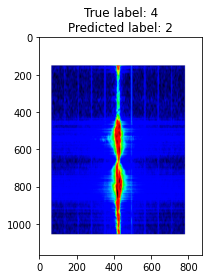

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


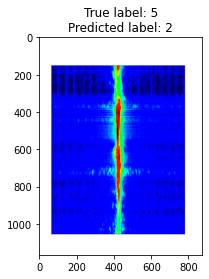

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


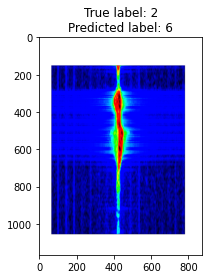

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


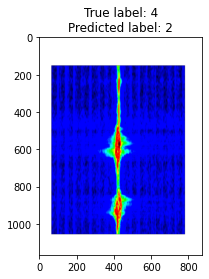

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


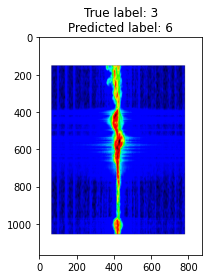

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


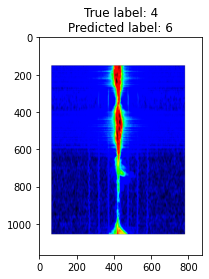

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


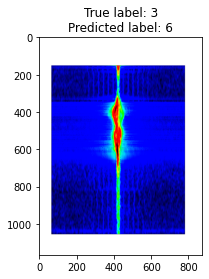

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


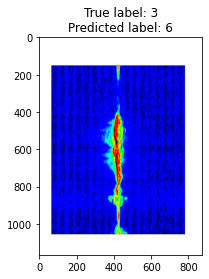

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


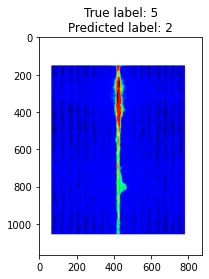

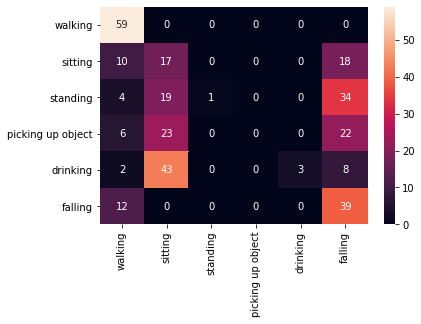

Testing accuracy: 37.19%


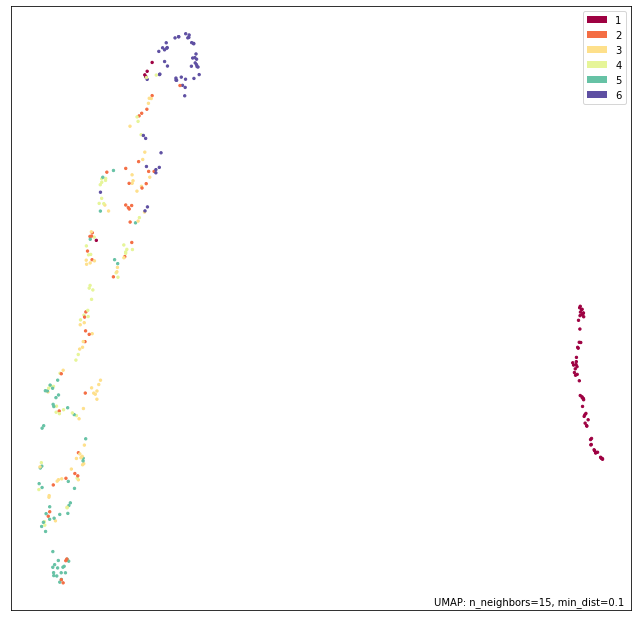

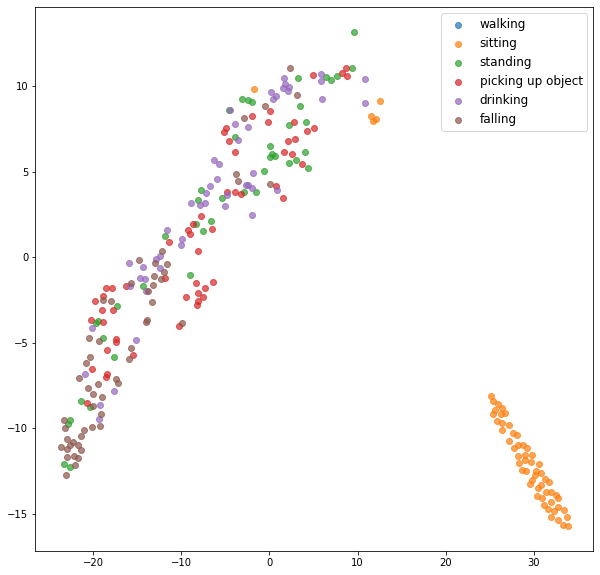

In [29]:
learning_rate = 0.002
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.Adam(neuralNetwork4.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_no_augmentation = train_model(model=neuralNetwork4, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=4)
        
#Finding the accuracy of the model
scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=4)

In [30]:
df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "Adam",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

      lr  weight decay optimizer loss function  accuracy type
0  0.001          0.05       SGD  CrossEntropy  0.893750  raw
1  0.002          0.05       SGD  CrossEntropy  0.853125  raw
2  0.001          0.05      Adam  CrossEntropy  0.818750  raw
3  0.002          0.05      Adam  CrossEntropy  0.371875  raw


In [31]:
torch.save(model_no_augmentation.state_dict(), "CNN Models/cnn_no_augmentation4.h5")

In [37]:
def train_model_kl(model, dataloader_train, dataloader_valid, optimizer, criterion, n_epochs, num):
    training_loss, validation_loss, training_acc, validation_acc = [], [], [], []
    
    for epoch in range(1, n_epochs+1):
        start = time.time()

        train_loss = 0
        valid_loss = 0
        
        correct_pred_train = 0
        total_items_train = 0

        model.train()

        for img, lbl in dataloader_train:
            img = Variable(img)
            lbl = Variable(lbl)

            optimizer.zero_grad()
            output = model(img)
            loss = Variable(criterion(output, lbl.view(32,-1)), requires_grad=True)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred_train += torch.sum(pred).item()
            total_items_train += pred.shape[0]
            
        train_loss /= len(dataloader_train.dataset)
        training_loss.append(train_loss)
        training_acc.append(correct_pred_train/total_items_train*100)
            

            
        model.eval()
        
        correct_pred = 0
        total_items = 0

        for img, lbl in dataloader_valid:
            img = Variable(img)
            lbl = Variable(lbl)
            output = model(img)
            loss = Variable(criterion(output, lbl.view(32,-1)), requires_grad=True)
            
            valid_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred += torch.sum(pred).item()
            total_items += pred.shape[0]
            
        valid_loss /= len(dataloader_valid.dataset)
        validation_loss.append(valid_loss)
        validation_acc.append(correct_pred/total_items*100)
        
        end = time.time()
        time_min, time_sec = epoch_duration(start, end)

        print(f'Epoch: {epoch} | Execution time: {time_min}min : {time_sec}sec')
        print(f'Training loss: {train_loss:.5f} | Validation loss: {valid_loss:.5f}')
        print(f'Training accuracy: {correct_pred_train/total_items_train*100:.2f} | Validation accuracy: {correct_pred/total_items*100:.2f}')
        print('\n')
        
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation loss')
    plt.savefig(fname=f'Model Images/cnn_loss_raw{num}.png')
    plt.show()

    plt.plot(training_acc)
    plt.plot(validation_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation accuracy')
    plt.savefig(fname=f'Model Images/cnn_acc_raw{num}.png')
    plt.show()

    return model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/functional.py:2610: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


Epoch: 1 | Execution time: 4min : 5sec
Training loss: 4.34591 | Validation loss: 4.88203
Training accuracy: 6.05 | Validation accuracy: 7.03


Epoch: 2 | Execution time: 3min : 50sec
Training loss: 4.34536 | Validation loss: 4.85532
Training accuracy: 6.15 | Validation accuracy: 0.78


Epoch: 3 | Execution time: 3min : 48sec
Training loss: 4.34674 | Validation loss: 4.85417
Training accuracy: 6.05 | Validation accuracy: 0.78


Epoch: 4 | Execution time: 3min : 57sec
Training loss: 4.34716 | Validation loss: 4.85249
Training accuracy: 6.64 | Validation accuracy: 1.17


Epoch: 5 | Execution time: 5min : 30sec
Training loss: 4.34541 | Validation loss: 4.85302
Training accuracy: 5.18 | Validation accuracy: 0.39


Epoch: 6 | Execution time: 6min : 4sec
Training loss: 4.34697 | Validation loss: 4.85582
Training accuracy: 5.96 | Validation accuracy: 0.78


Epoch: 7 | Execution time: 5min : 3sec
Training loss: 4.34478 | Validation loss: 4.85218
Training accuracy: 5.86 | Validation accuracy: 0.

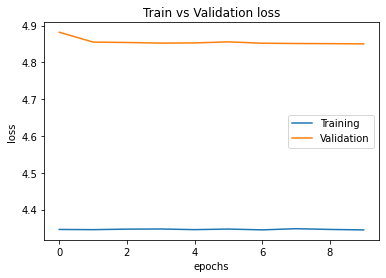

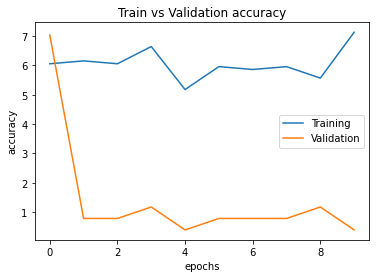

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


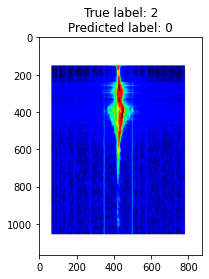

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


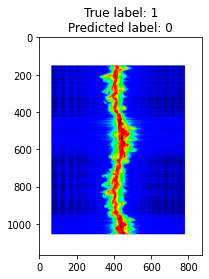

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


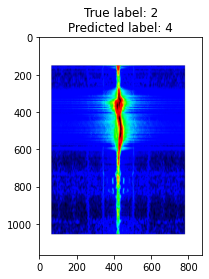

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


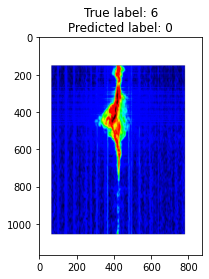

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


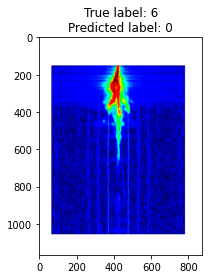

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


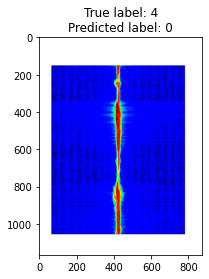

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


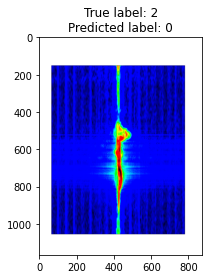

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


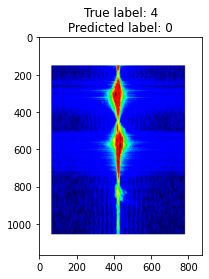

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


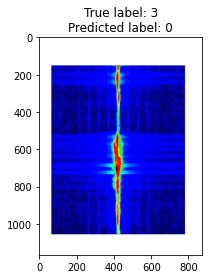

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


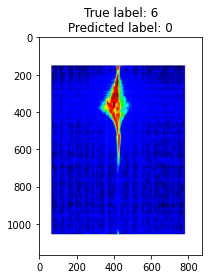

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


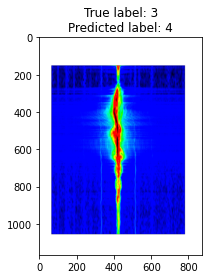

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


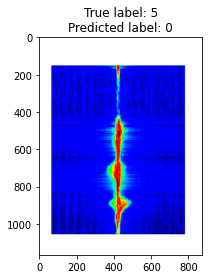

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


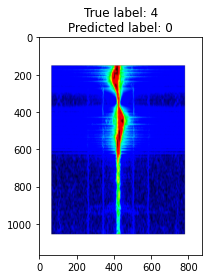

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


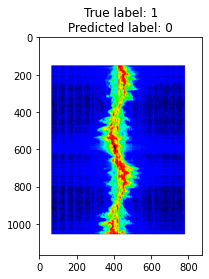

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


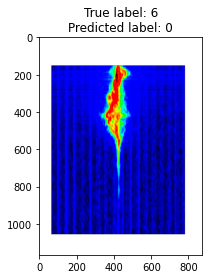

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


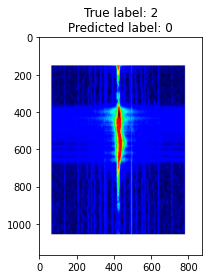

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


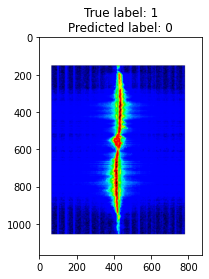

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


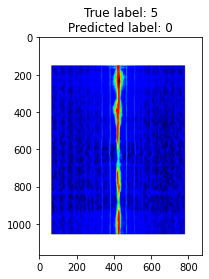

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


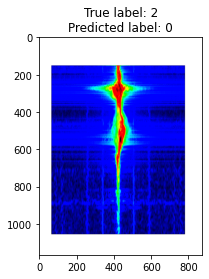

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


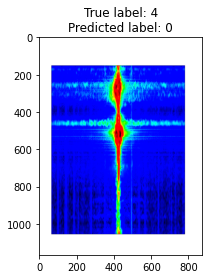

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


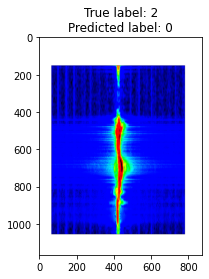

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


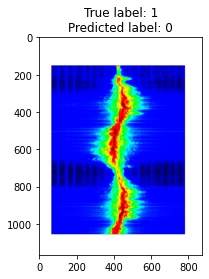

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


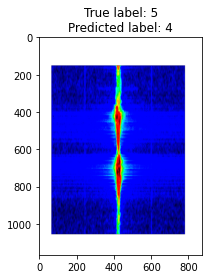

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


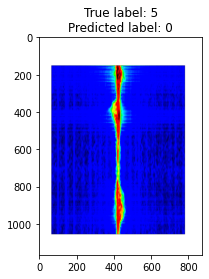

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


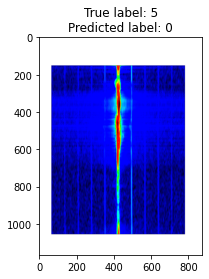

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


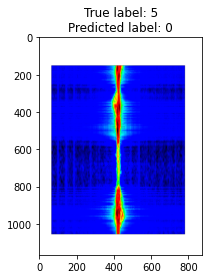

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


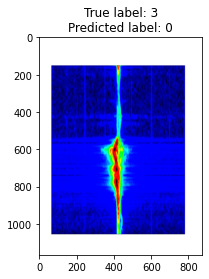

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


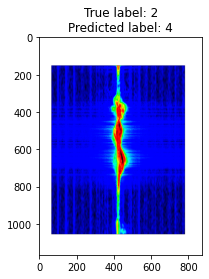

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


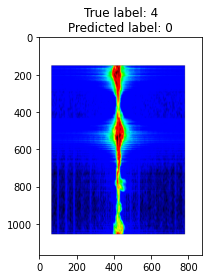

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


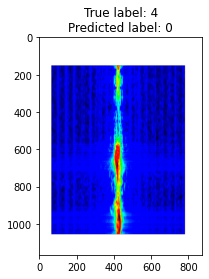

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


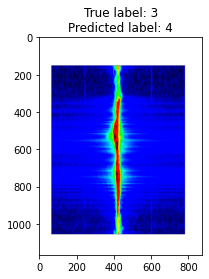

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


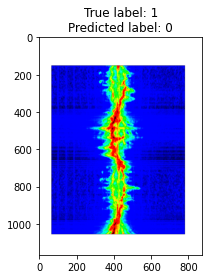

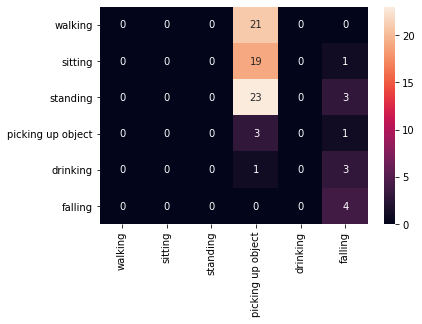

Testing accuracy: 2.19%


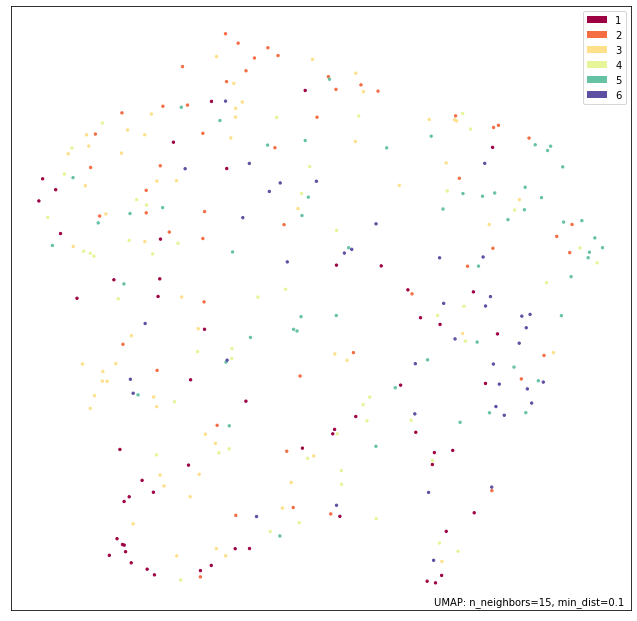

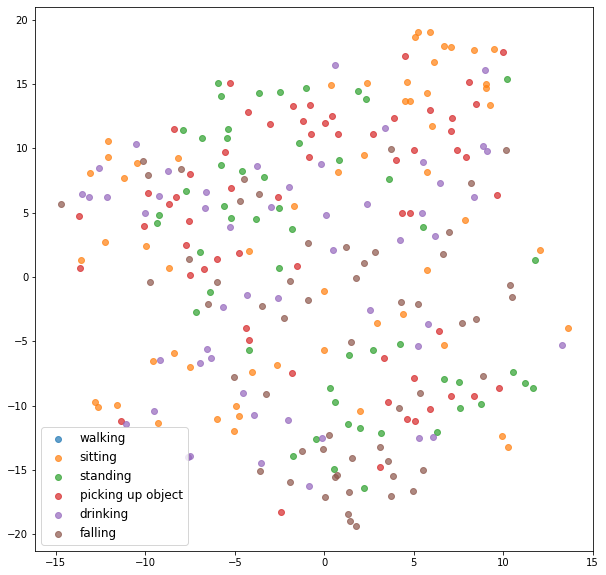

0.021875
   Unnamed: 0      lr  weight decay optimizer loss function  accuracy  \
0         0.0  0.0010          0.05       SGD  CrossEntropy  0.893750   
1         1.0  0.0020          0.05       SGD  CrossEntropy  0.853125   
2         2.0  0.0010          0.05      Adam  CrossEntropy  0.818750   
3         3.0  0.0020          0.05      Adam  CrossEntropy  0.371875   
4         4.0  0.0010          0.05       SGD  CrossEntropy  0.887500   
5         5.0  0.0020          0.05       SGD  CrossEntropy  0.896875   
6         6.0  0.0010          0.05      Adam  CrossEntropy  0.846875   
7         7.0  0.0020          0.05      Adam  CrossEntropy  0.837500   
8         NaN  0.0001          0.05       SGD       KL Loss  0.021875   

        type  
0        raw  
1        raw  
2        raw  
3        raw  
4  augmented  
5  augmented  
6  augmented  
7  augmented  
8        raw  


In [43]:
neuralNetwork5 = NeuralNetwork()

learning_rate = 1e-4
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.SGD(neuralNetwork5.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
loss_function = nn.KLDivLoss(reduction='mean')
        
#Calling the function to train the model
model_no_augmentation = train_model_kl(model=neuralNetwork5, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=5)

scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=5)
print(scores_cnn_no_augmentation.item()/100)

df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "KL Loss",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/functional.py:2610: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


Epoch: 1 | Execution time: 4min : 59sec
Training loss: 4.42232 | Validation loss: 4.93403
Training accuracy: 16.50 | Validation accuracy: 23.05


Epoch: 2 | Execution time: 4min : 43sec
Training loss: 4.42311 | Validation loss: 4.93374
Training accuracy: 13.77 | Validation accuracy: 21.88


Epoch: 3 | Execution time: 4min : 34sec
Training loss: 4.42190 | Validation loss: 4.93264
Training accuracy: 14.84 | Validation accuracy: 20.31


Epoch: 4 | Execution time: 4min : 3sec
Training loss: 4.42146 | Validation loss: 4.93150
Training accuracy: 14.84 | Validation accuracy: 21.48


Epoch: 5 | Execution time: 4min : 12sec
Training loss: 4.42364 | Validation loss: 4.93526
Training accuracy: 14.55 | Validation accuracy: 21.09


Epoch: 6 | Execution time: 4min : 0sec
Training loss: 4.42192 | Validation loss: 4.93381
Training accuracy: 14.45 | Validation accuracy: 21.09


Epoch: 7 | Execution time: 4min : 2sec
Training loss: 4.42115 | Validation loss: 4.93423
Training accuracy: 14.45 | Validation

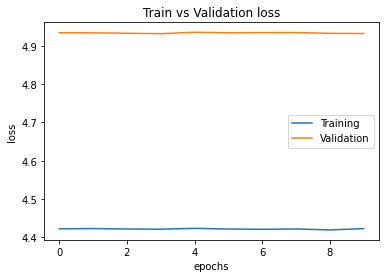

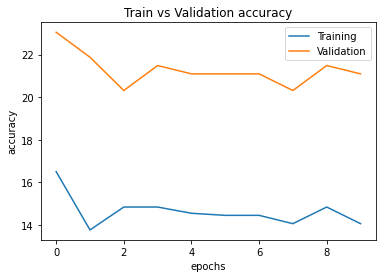

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


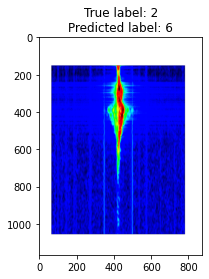

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


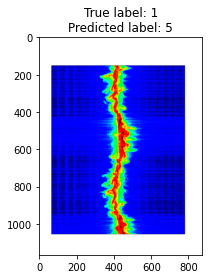

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


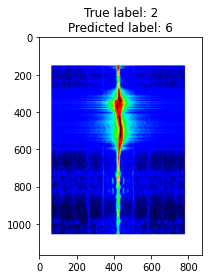

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


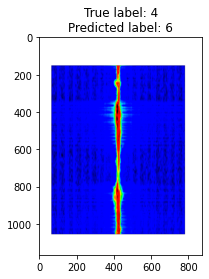

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


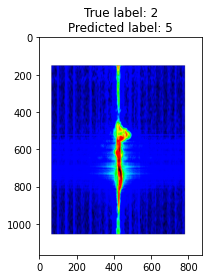

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


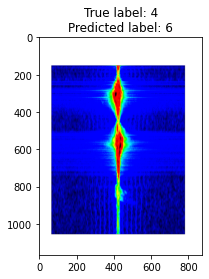

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


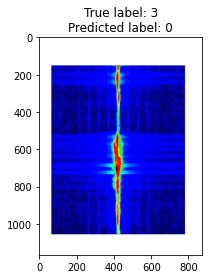

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


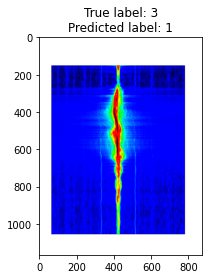

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


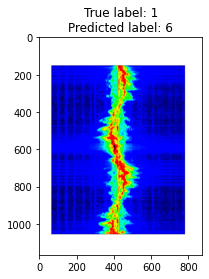

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


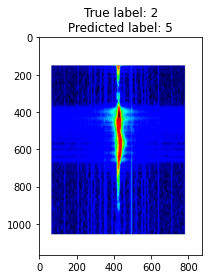

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


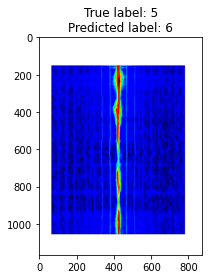

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


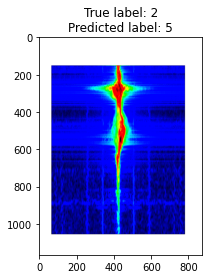

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


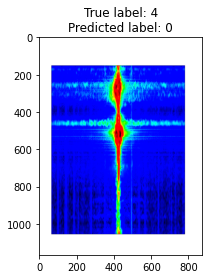

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


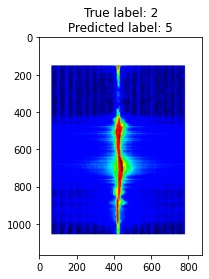

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


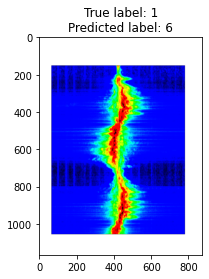

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


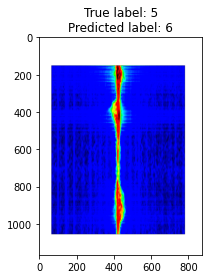

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


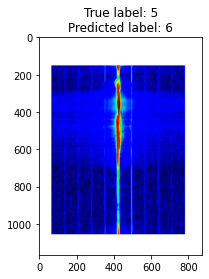

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


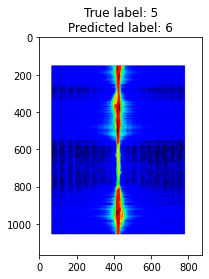

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


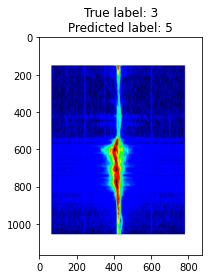

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


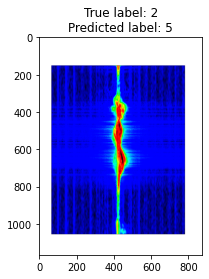

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


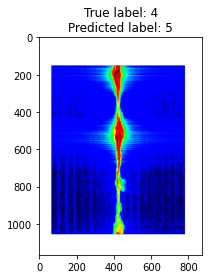

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


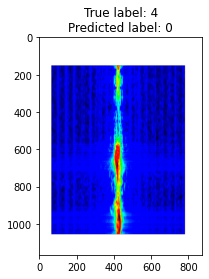

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


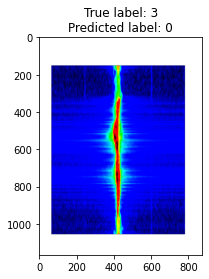

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


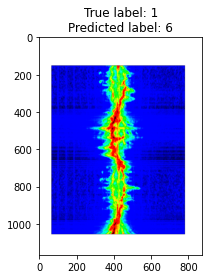

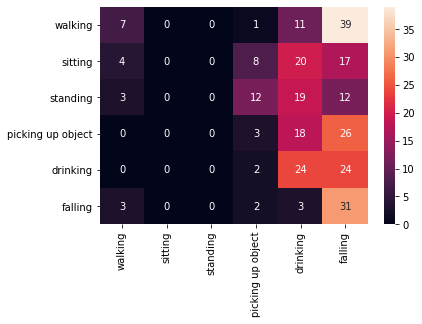

Testing accuracy: 20.31%


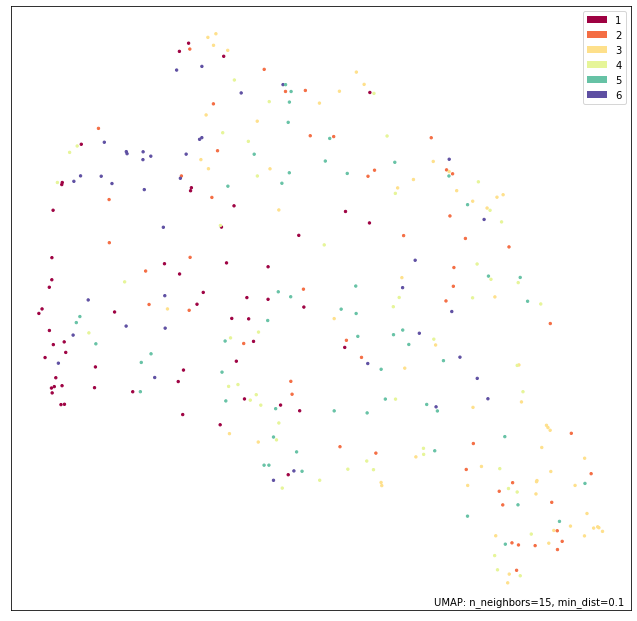

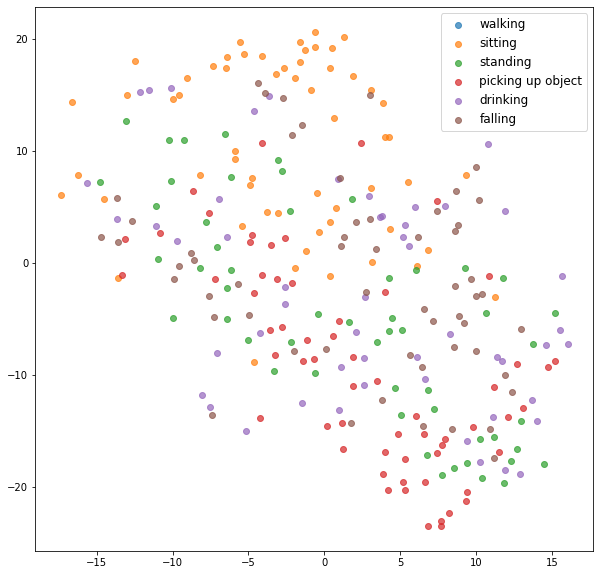

0.203125
   Unnamed: 0      lr  weight decay optimizer loss function  accuracy  \
0         0.0  0.0010          0.05       SGD  CrossEntropy  0.893750   
1         1.0  0.0020          0.05       SGD  CrossEntropy  0.853125   
2         2.0  0.0010          0.05      Adam  CrossEntropy  0.818750   
3         3.0  0.0020          0.05      Adam  CrossEntropy  0.371875   
4         4.0  0.0010          0.05       SGD  CrossEntropy  0.887500   
5         5.0  0.0020          0.05       SGD  CrossEntropy  0.896875   
6         6.0  0.0010          0.05      Adam  CrossEntropy  0.846875   
7         7.0  0.0020          0.05      Adam  CrossEntropy  0.837500   
8         NaN  0.0001          0.05       SGD       KL Loss  0.021875   
9         NaN  0.0001          0.05       SGD           MSE  0.203125   

        type  
0        raw  
1        raw  
2        raw  
3        raw  
4  augmented  
5  augmented  
6  augmented  
7  augmented  
8        raw  
9        raw  


In [44]:
neuralNetwork6 = NeuralNetwork()

learning_rate = 1e-4
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.Adam(neuralNetwork6.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.KLDivLoss(reduction='mean')
        
#Calling the function to train the model
model_no_augmentation = train_model_kl(model=neuralNetwork6, dataloader_train=train_dataloader, 
                            dataloader_valid=valid_dataloader, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=5)

scores_cnn_no_augmentation = predictions(model=model_no_augmentation, test_dataloader=test_dataloader, num=5)
print(scores_cnn_no_augmentation.item()/100)

df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "MSE",
    "accuracy": scores_cnn_no_augmentation.item()/100,
    "type": "raw"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

# Custom Dataset with Data Augmentation

In [14]:
from augmented_dataset import *

In [15]:
human_image_dataset_augmented = create_dataset_augmented(files, labels)

In [16]:
train_augmented, valid_augmented, test_augmented = split_data_cnn_augmented(human_image_dataset_augmented)

In [17]:
train_dataloader_augmented, valid_dataloader_augmented, test_dataloader_augmented = \
        dataloader_augmented(train_augmented, valid_augmented, test_augmented)

Training sample size:  1024 Validation dataset size:  256 Test sample size:  320


Converting Augmented Images to numpy array and apply Machine Learning Algorithms

In [10]:
from augmented_data import *

In [11]:
x_train_augmented, y_train_augmented = train_images(train_augmented)

In [12]:
x_train_augmented, y_train_augmented = valid_images(valid_augmented, x_train_augmented, y_train_augmented)

In [13]:
x_test_augmented, y_test_augmented = test_images(test_augmented)

# Machine Learning models on Augmented Data

RandomForest on model with best parameters

In [14]:
from random_forest_models import *

In [17]:
random_forest_augmented = random_forest_augmented_train(x_train_augmented, y_train_augmented)

Best parameters are: {'bootstrap': False, 'n_estimators': 200}
                 Best score for the parameter is: 0.82578125


In [18]:
y_pred_rf_augmented = random_forest_test(random_forest_augmented, x_test_augmented)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
conf_mat_rf_augmented = confusion_matrix(y_test_augmented, y_pred_rf_augmented)
conf_mat_rf_augmented

array([[50,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  3,  1,  0],
       [ 0,  0, 47,  0, 11,  0],
       [ 0,  2,  2, 43,  7,  0],
       [ 0,  3,  6,  8, 32,  2],
       [ 0,  0,  0,  1,  0, 44]])

In [21]:
score_rf_augmented = accuracy_score(y_test_augmented, y_pred_rf_augmented)
score_rf_augmented

0.85625

In [22]:
report_rf_augmented = classification_report(y_test_augmented, y_pred_rf_augmented, output_dict=True)
df = pd.DataFrame(report_rf_augmented)
df.to_csv('Model Reports/Random_Forest_Augmented.csv')

df

1          2          3          4          5          6  \
precision   1.0   0.920635   0.854545   0.781818   0.627451   0.956522   
recall      1.0   0.935484   0.810345   0.796296   0.627451   0.977778   
f1-score    1.0   0.928000   0.831858   0.788991   0.627451   0.967033   
support    50.0  62.000000  58.000000  54.000000  51.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision   0.85625    0.856829      0.855952  
recall      0.85625    0.857892      0.856250  
f1-score    0.85625    0.857222      0.855956  
support     0.85625  320.000000    320.000000

In [23]:
df = pd.read_csv('Accuracy.csv')
gnn = pd.DataFrame(data={
    "Model": "Random Forest",
    "Accuracy": score_rf_augmented,
    "Type": "Augmented"
}, index=[0])

df = df.append(gnn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy       Type
0         Random Forest   0.88125        Raw
1  Gaussian Naive Bayes   0.48750        Raw
2                   KNN   0.81250        Raw
3         Random Forest   0.85625  Augmented


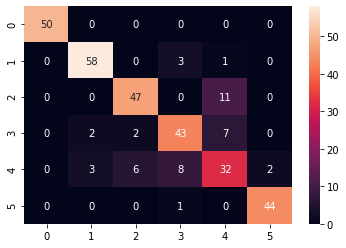

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_mat_rf_augmented, annot=True)
plt.savefig(fname='Model Images/random_forest_augmented.png')
plt.show()

Gaussian Naive Bayes 

In [25]:
from gaussian_nb_models import *

In [26]:
gaussian_nb_augmented = gaussian_nb_augmented_train(x_train_augmented, y_train_augmented)

Best parameters are: {'var_smoothing': 1e-09}
             Best score for the parameter is: 0.6304687499999999


In [27]:
y_pred_gnb_augmented = gaussian_nb_test(gaussian_nb_augmented, x_test_augmented)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
conf_mat_gnb_augmented = confusion_matrix(y_test_augmented, y_pred_gnb_augmented)
conf_mat_gnb_augmented

array([[45,  0,  1,  1,  0,  3],
       [ 0, 35,  8,  4,  5, 10],
       [ 0,  2, 31,  6,  8, 11],
       [ 3,  1,  9, 26, 12,  3],
       [ 0,  4,  9,  9, 23,  6],
       [ 4,  0,  0,  0,  0, 41]])

In [30]:
score_gnb_augmented = accuracy_score(y_test_augmented, y_pred_gnb_augmented)
score_gnb_augmented

0.628125

In [31]:
report_gnb_augmented = classification_report(y_test_augmented, y_pred_gnb_augmented, output_dict=True)
df = pd.DataFrame(report_gnb_augmented)
df.to_csv('Model Reports/GaussianNB_Augmented.csv')

df

1          2          3          4          5          6  \
precision   0.865385   0.833333   0.534483   0.565217   0.479167   0.554054   
recall      0.900000   0.564516   0.534483   0.481481   0.450980   0.911111   
f1-score    0.882353   0.673077   0.534483   0.520000   0.464646   0.689076   
support    50.000000  62.000000  58.000000  54.000000  51.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision  0.628125    0.638606      0.643211  
recall     0.628125    0.640429      0.628125  
f1-score   0.628125    0.627272      0.623856  
support    0.628125  320.000000    320.000000

In [32]:
df = pd.read_csv('Accuracy.csv')

gnn = pd.DataFrame(data={
    "Model": "Gaussian Naive Bayes",
    "Accuracy": score_gnb_augmented,
    "Type": "Augmented"
}, index=[0])

df = df.append(gnn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy       Type
0         Random Forest  0.881250        Raw
1  Gaussian Naive Bayes  0.487500        Raw
2                   KNN  0.812500        Raw
3         Random Forest  0.856250  Augmented
4  Gaussian Naive Bayes  0.628125  Augmented


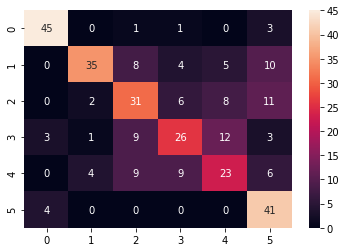

In [33]:
sns.heatmap(conf_mat_gnb_augmented, annot=True)
plt.savefig(fname='Model Images/gaussian_nb_augmented.png')
plt.show()

K-Nearest Neighbor

In [34]:
from knn_models import *

In [35]:
knn_augmented = knn_augmented_train(x_train_augmented, y_train_augmented)

Best parameters are: {'n_neighbors': 5}
             Best score for the parameter is: 0.81640625


In [36]:
y_pred_knn_augmented = knn_test(knn_augmented, x_test_augmented)

In [37]:
conf_mat_knn_augmented = confusion_matrix(y_test_augmented, y_pred_knn_augmented)
conf_mat_knn_augmented

array([[50,  0,  0,  0,  0,  0],
       [ 1, 56,  2,  1,  2,  0],
       [ 0,  2, 52,  1,  3,  0],
       [ 0,  6,  7, 31, 10,  0],
       [ 0,  2,  5,  4, 40,  0],
       [ 0,  1,  4,  0,  0, 40]])

In [38]:
score_knn_augmented = accuracy_score(y_test_augmented, y_pred_knn_augmented)
score_knn_augmented

0.840625

In [39]:
report_knn_augmented = classification_report(y_test_augmented, y_pred_knn_augmented, output_dict=True)
df = pd.DataFrame(report_knn_augmented)
df.to_csv('Model Reports/KNN_Augmented.csv')

df

1          2          3          4          5          6  \
precision   0.980392   0.835821   0.742857   0.837838   0.727273   1.000000   
recall      1.000000   0.903226   0.896552   0.574074   0.784314   0.888889   
f1-score    0.990099   0.868217   0.812500   0.681319   0.754717   0.941176   
support    50.000000  62.000000  58.000000  54.000000  51.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision  0.840625    0.854030      0.847689  
recall     0.840625    0.841176      0.840625  
f1-score   0.840625    0.841338      0.837794  
support    0.840625  320.000000    320.000000

In [40]:
df = pd.read_csv('Accuracy.csv')

knn = pd.DataFrame(data={
    "Model": "KNN",
    "Accuracy": score_knn_augmented,
    "Type": "Augmented"
}, index=[0])

df = df.append(knn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy       Type
0         Random Forest  0.881250        Raw
1  Gaussian Naive Bayes  0.487500        Raw
2                   KNN  0.812500        Raw
3         Random Forest  0.856250  Augmented
4  Gaussian Naive Bayes  0.628125  Augmented
5                   KNN  0.840625  Augmented


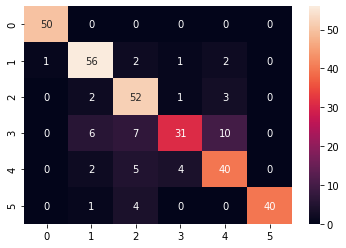

In [41]:
sns.heatmap(conf_mat_knn_augmented, annot=True)
plt.savefig(fname='Model Images/knn_augmented.png')
plt.show()

Deep Learning model training starts

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


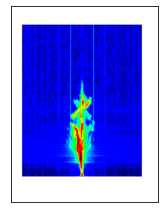

In [18]:
imgs, lbs = iter(train_dataloader_augmented).next()
imgs, lbs = np.asarray(imgs), np.asarray(lbs)

fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(2, 16, 1, xticks=[], yticks=[])
ax.imshow(imgs[0].transpose(2,1,0).squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

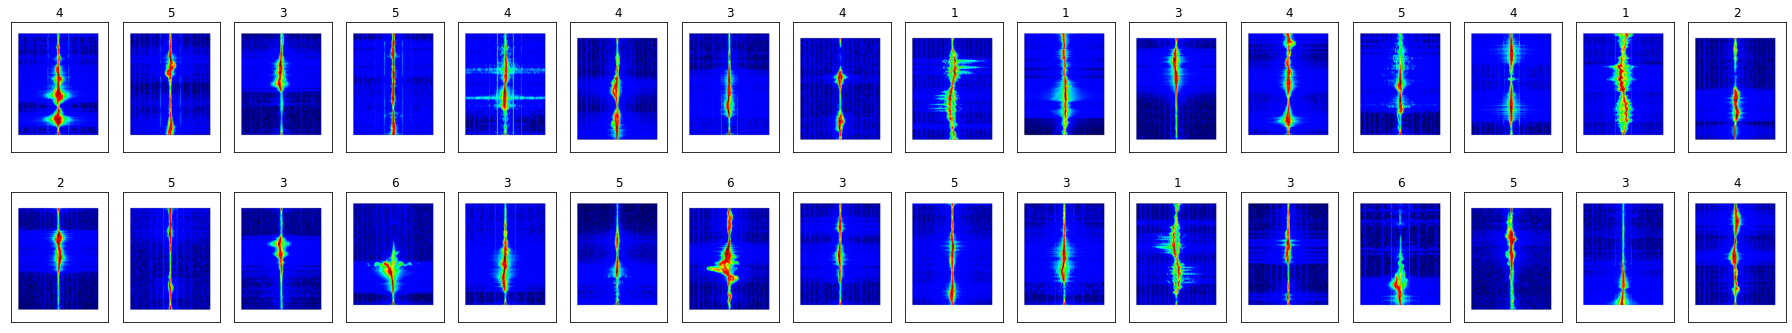

In [9]:
imgs, lbs = iter(train_dataloader_augmented).next()
imgs, lbs = np.asarray(imgs), np.asarray(lbs)
BATCH_SIZE = 32

fig = plt.figure(figsize=(25,5))
for i in range(BATCH_SIZE):
    ax = fig.add_subplot(2, 16, i+1, xticks=[], yticks=[])
    ax.imshow(imgs[i].transpose(2,1,0).squeeze())
    ax.set_title(lbs[i])

plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

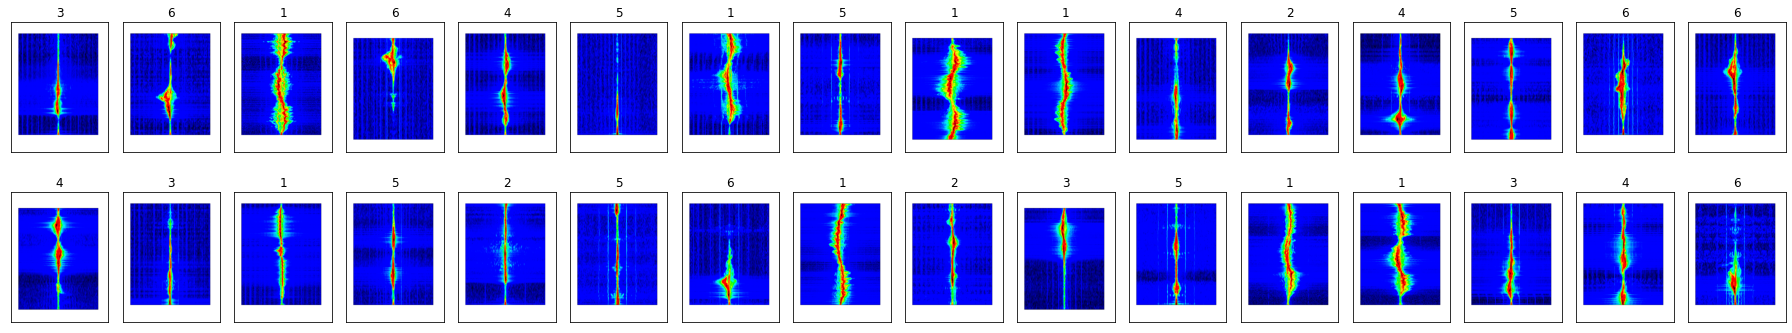

In [10]:
imgs, lbs = iter(valid_dataloader_augmented).next()
imgs, lbs = np.asarray(imgs), np.asarray(lbs)

fig = plt.figure(figsize=(25,5))
for i in range(BATCH_SIZE):
    ax = fig.add_subplot(2, 16, i+1, xticks=[], yticks=[])
    ax.imshow(imgs[i].transpose(2,1,0).squeeze())
    ax.set_title(lbs[i])

plt.tight_layout()

In [9]:
from cnn import *
import time

#Deep learning package
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode


#Visualisation packages and decomposition packages
import umap
import umap.plot
from sklearn.manifold import TSNE

In [12]:
def train_model(model, dataloader_train, dataloader_valid, optimizer, criterion, n_epochs, num):
    training_loss, validation_loss, training_acc, validation_acc = [], [], [], []
    
    for epoch in range(1, n_epochs+1):
        start = time.time()

        train_loss = 0
        valid_loss = 0
        
        correct_pred_train = 0
        total_items_train = 0

        model.train()

        for img, lbl in dataloader_train:
            img = Variable(img)
            lbl = Variable(lbl)

            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, lbl)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred_train += torch.sum(pred).item()
            total_items_train += pred.shape[0]
            
        train_loss /= len(dataloader_train.dataset)
        training_loss.append(train_loss)
        training_acc.append(correct_pred_train/total_items_train*100)
            

            
        model.eval()
        
        correct_pred = 0
        total_items = 0

        for img, lbl in dataloader_valid:
            img = Variable(img)
            lbl = Variable(lbl)
            output = model(img)
            loss = criterion(output, lbl)
            
            valid_loss += loss.item()*img.size(0)
            pred = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], lbl)
            correct_pred += torch.sum(pred).item()
            total_items += pred.shape[0]
            
        valid_loss /= len(dataloader_valid.dataset)
        validation_loss.append(valid_loss)
        validation_acc.append(correct_pred/total_items*100)
        
        end = time.time()
        time_min, time_sec = epoch_duration(start, end)

        print(f'Epoch: {epoch} | Execution time: {time_min}min : {time_sec}sec')
        print(f'Training loss: {train_loss:.5f} | Validation loss: {valid_loss:.5f}')
        print(f'Training accuracy: {correct_pred_train/total_items_train*100:.2f} | Validation accuracy: {correct_pred/total_items*100:.2f}')
        print('\n')
        
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation loss')
    plt.savefig(fname=f'Model Images/cnn_loss_raw{num}.png')
    plt.show()

    plt.plot(training_acc)
    plt.plot(validation_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Train vs Validation accuracy')
    plt.savefig(fname=f'Model Images/cnn_acc_raw{num}.png')
    plt.show()

    return model

In [13]:
def show_images(image, title=''):
    image = image.permute(2,1,0).numpy()
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [14]:
def predictions(model, test_dataloader, num):
    label_pred = []
    classes = 7
    confusion_matrix = torch.zeros(classes, classes)
    result_vis = []
    label_vis = []

    with torch.no_grad():
        for img, lbl in test_dataloader:
            img = Variable(img)
            lbl = Variable(lbl)
            output = model(img)
            label_pred.append(output.argmax(dim=1).data.cpu().numpy())

            _, pred = torch.max(output,1)
            result_vis.extend(output.numpy())
            label_vis.extend(lbl.numpy())

            for i, j in zip(lbl.view(-1), pred.view(-1)):
                confusion_matrix[i,j] += 1

    label_pred = np.concatenate(label_pred)

    img, lbl = next(iter(test_dataloader))

    for image, label, pred in zip(img, lbl, label_pred):
        if label != pred:
            show_images(image, title=f'True label: {label}\nPredicted label: {pred}')
            
    #Creating the confusion matrix
    class_names = ['walking', 'sitting', 'standing', 'picking up object', 'drinking', 'falling']

    df = pd.DataFrame(confusion_matrix[1:, 1:], index=class_names, columns=class_names, dtype=int)

    sns.heatmap(df, annot=True)
    plt.savefig(fname=f'CNN Models/conf_mat{num}.png')
    plt.show()
    score = confusion_matrix.diagonal().sum()/confusion_matrix.sum()*100
    print(f'Testing accuracy: {score:.2f}%')
    
    #UMAP Visualisation
    result = np.array(result_vis)
    lbls = np.array(label_vis)

    umap_obj = umap.UMAP().fit(result)
    umap.plot.points(umap_obj, labels=lbls)
    plt.savefig(fname=f'CNN Models/umap_raw{num}.png')
    plt.show()
    
    #TSNE Visualisation
    tsne = TSNE(n_components=2, perplexity=30)
    tsne_map = tsne.fit_transform(result)
    tsne_map.shape

    fig, ax = plt.subplots(figsize=(10,10))
    classes = 6

    for i in range(classes):
        index = np.in1d(lbls, i)
        ax.scatter(tsne_map[index,0], tsne_map[index,1], label=class_names[i], alpha=0.7)

    ax.legend(fontsize='large')
    plt.savefig(fname=f'CNN Models/tsne_raw{num}.png')
    plt.show()
    return score

Epoch: 1 | Execution time: 11min : 34sec
Training loss: 1.51394 | Validation loss: 1.14803
Training accuracy: 41.41 | Validation accuracy: 61.72


Epoch: 2 | Execution time: 10min : 45sec
Training loss: 0.91686 | Validation loss: 0.86298
Training accuracy: 65.33 | Validation accuracy: 66.80


Epoch: 3 | Execution time: 9min : 16sec
Training loss: 0.59053 | Validation loss: 0.53960
Training accuracy: 79.10 | Validation accuracy: 80.86


Epoch: 4 | Execution time: 9min : 57sec
Training loss: 0.45450 | Validation loss: 0.44099
Training accuracy: 86.13 | Validation accuracy: 84.77


Epoch: 5 | Execution time: 11min : 27sec
Training loss: 0.39626 | Validation loss: 0.47953
Training accuracy: 86.33 | Validation accuracy: 79.69


Epoch: 6 | Execution time: 10min : 35sec
Training loss: 0.35570 | Validation loss: 0.41374
Training accuracy: 88.67 | Validation accuracy: 83.98


Epoch: 7 | Execution time: 9min : 26sec
Training loss: 0.32346 | Validation loss: 0.41996
Training accuracy: 88.87 | Val

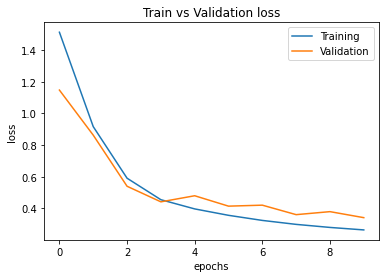

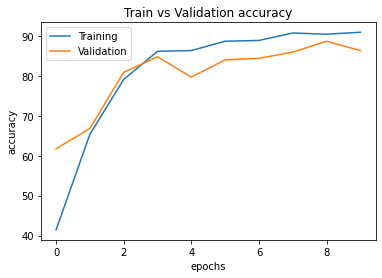

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


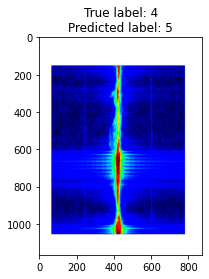

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


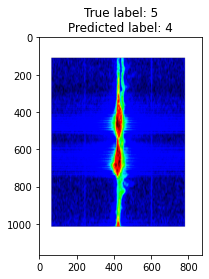

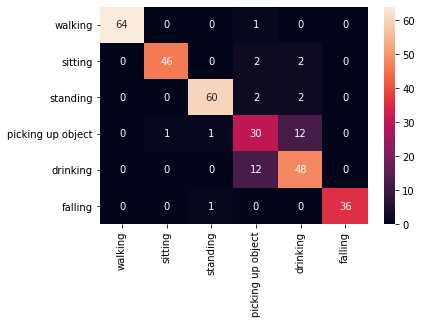

Testing accuracy: 88.75%


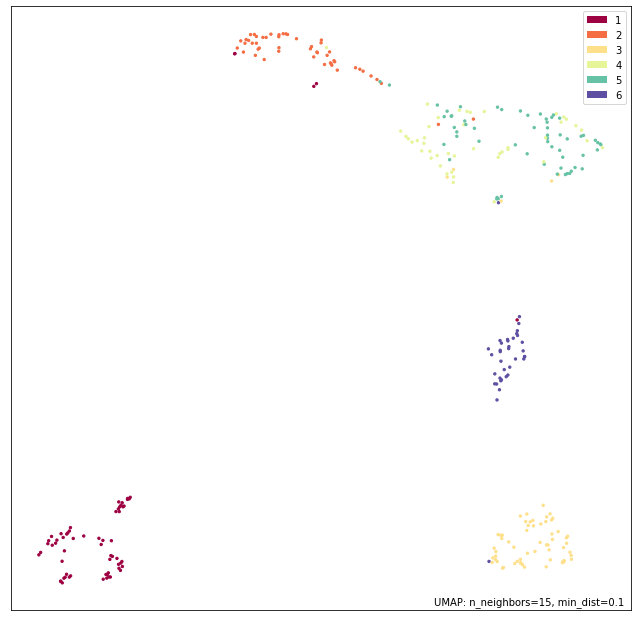

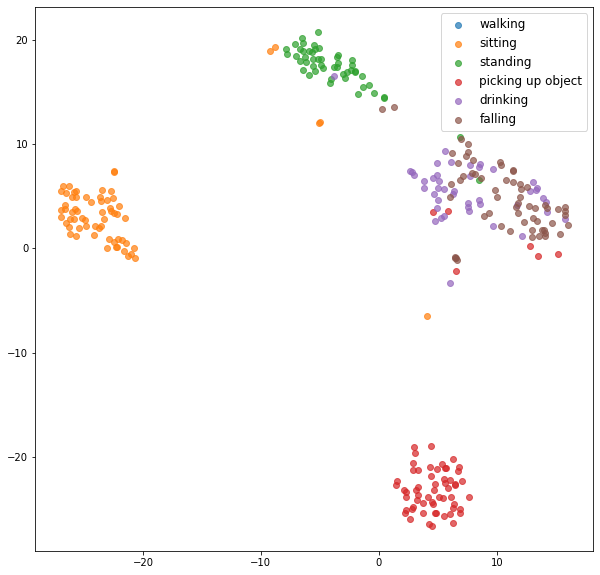

FileNotFoundError: [Errno 2] No such file or directory: 'CNN models.csv'

In [15]:
neuralNetwork1 = NeuralNetwork()
neuralNetwork2 = NeuralNetwork()
neuralNetwork3 = NeuralNetwork()
neuralNetwork4 = NeuralNetwork()

learning_rate = 0.001
weight_decay = 0.05
momentum = 0.9
n_epochs=10


#CNN Model 1
optimizer = optim.SGD(neuralNetwork1.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_augmentation = train_model(model=neuralNetwork1, dataloader_train=train_dataloader_augmented, 
                            dataloader_valid=valid_dataloader_augmented, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=1)
        
#Finding the accuracy of the model
scores_cnn_augmentation = predictions(model=model_augmentation, test_dataloader=test_dataloader_augmented, num=1)

In [16]:
df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_augmentation.item()/100,
    "type": "augmented"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

torch.save(model_augmentation.state_dict(), "CNN Models/cnn_augmentation1.h5")

      lr  weight decay optimizer loss function  accuracy       type
0  0.001          0.05       SGD  CrossEntropy  0.893750        raw
1  0.002          0.05       SGD  CrossEntropy  0.853125        raw
2  0.001          0.05      Adam  CrossEntropy  0.818750        raw
3  0.002          0.05      Adam  CrossEntropy  0.371875        raw
4  0.001          0.05       SGD  CrossEntropy  0.887500  augmented


NameError: name 'train_dataloader' is not defined

Epoch: 1 | Execution time: 10min : 44sec
Training loss: 1.59646 | Validation loss: 1.25152
Training accuracy: 32.81 | Validation accuracy: 57.03


Epoch: 2 | Execution time: 9min : 29sec
Training loss: 0.92810 | Validation loss: 0.78654
Training accuracy: 65.53 | Validation accuracy: 67.97


Epoch: 3 | Execution time: 8min : 38sec
Training loss: 0.66957 | Validation loss: 0.55057
Training accuracy: 75.68 | Validation accuracy: 79.69


Epoch: 4 | Execution time: 8min : 28sec
Training loss: 0.47409 | Validation loss: 0.49406
Training accuracy: 83.79 | Validation accuracy: 81.64


Epoch: 5 | Execution time: 8min : 24sec
Training loss: 0.41964 | Validation loss: 0.47647
Training accuracy: 84.38 | Validation accuracy: 81.64


Epoch: 6 | Execution time: 9min : 28sec
Training loss: 0.38290 | Validation loss: 0.43449
Training accuracy: 86.43 | Validation accuracy: 84.38


Epoch: 7 | Execution time: 10min : 44sec
Training loss: 0.36117 | Validation loss: 0.44753
Training accuracy: 86.72 | Valid

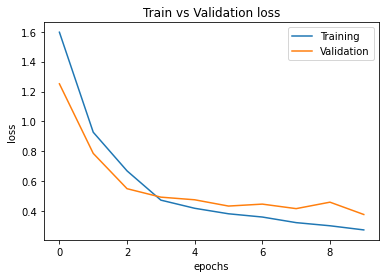

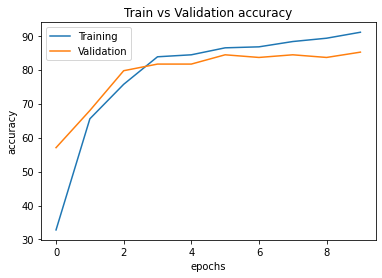

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


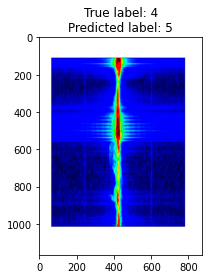

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


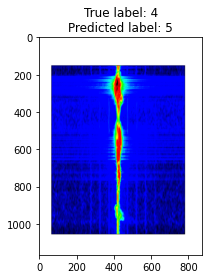

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


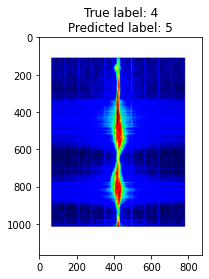

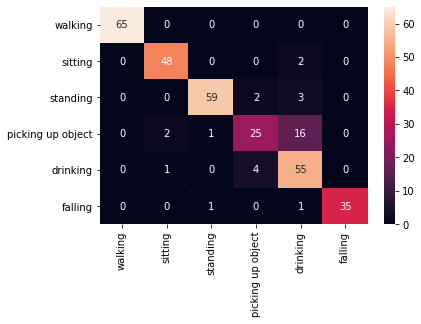

Testing accuracy: 89.69%


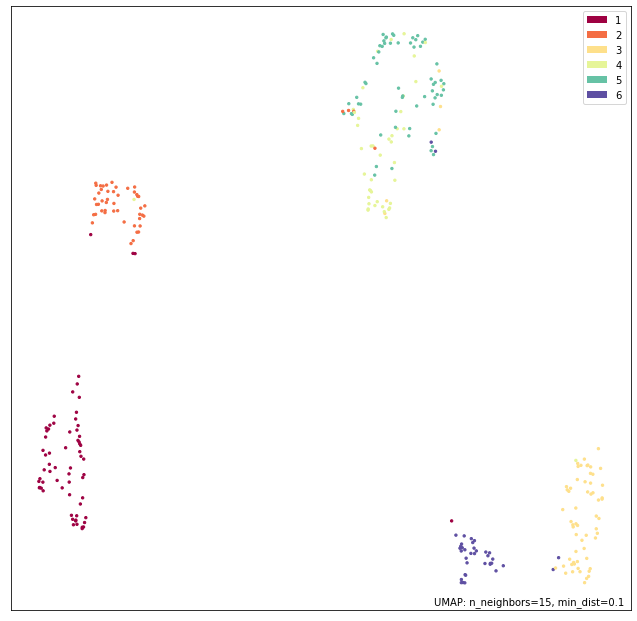

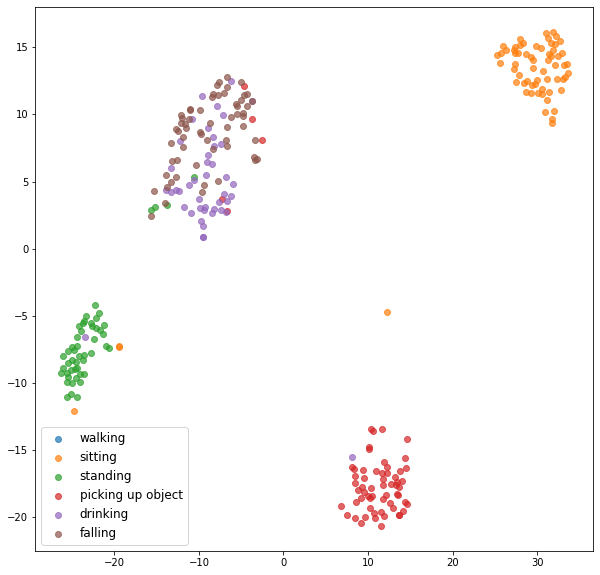

      lr  weight decay optimizer loss function  accuracy       type
0  0.001          0.05       SGD  CrossEntropy  0.893750        raw
1  0.002          0.05       SGD  CrossEntropy  0.853125        raw
2  0.001          0.05      Adam  CrossEntropy  0.818750        raw
3  0.002          0.05      Adam  CrossEntropy  0.371875        raw
4  0.001          0.05       SGD  CrossEntropy  0.887500  augmented
5  0.002          0.05       SGD  CrossEntropy  0.896875  augmented


In [17]:
#CNN model 2

learning_rate = 0.002
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.SGD(neuralNetwork2.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_augmentation = train_model(model=neuralNetwork2, dataloader_train=train_dataloader_augmented, 
                            dataloader_valid=valid_dataloader_augmented, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=2)
        
#Finding the accuracy of the model
scores_cnn_augmentation = predictions(model=model_augmentation, test_dataloader=test_dataloader_augmented, num=2)

df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "SGD",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_augmentation.item()/100,
    "type": "augmented"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

torch.save(model_augmentation.state_dict(), "CNN Models/cnn_augmentation2.h5")

Epoch: 1 | Execution time: 9min : 2sec
Training loss: 16.65615 | Validation loss: 1.54471
Training accuracy: 22.27 | Validation accuracy: 34.38


Epoch: 2 | Execution time: 9min : 3sec
Training loss: 1.57411 | Validation loss: 1.49155
Training accuracy: 37.01 | Validation accuracy: 41.80


Epoch: 3 | Execution time: 8min : 53sec
Training loss: 1.44130 | Validation loss: 1.11037
Training accuracy: 43.55 | Validation accuracy: 58.98


Epoch: 4 | Execution time: 9min : 4sec
Training loss: 1.16283 | Validation loss: 1.21910
Training accuracy: 53.71 | Validation accuracy: 43.75


Epoch: 5 | Execution time: 8min : 42sec
Training loss: 1.00180 | Validation loss: 0.87952
Training accuracy: 62.70 | Validation accuracy: 60.94


Epoch: 6 | Execution time: 8min : 46sec
Training loss: 0.92385 | Validation loss: 0.73695
Training accuracy: 62.70 | Validation accuracy: 72.27


Epoch: 7 | Execution time: 10min : 22sec
Training loss: 0.76270 | Validation loss: 0.65737
Training accuracy: 71.09 | Validati

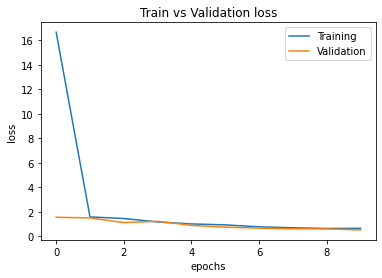

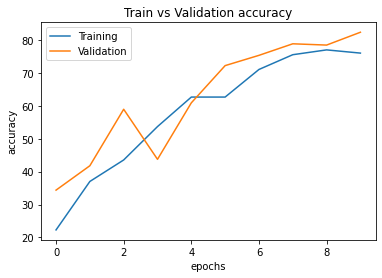

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


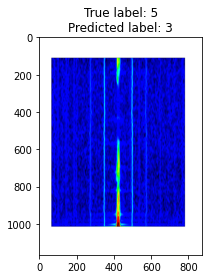

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


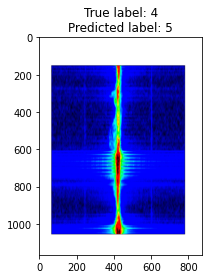

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


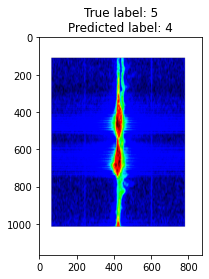

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


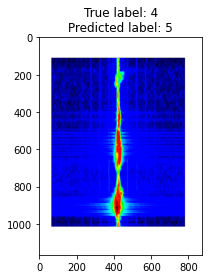

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


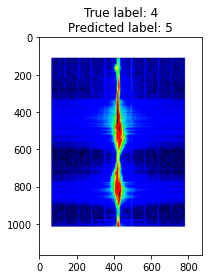

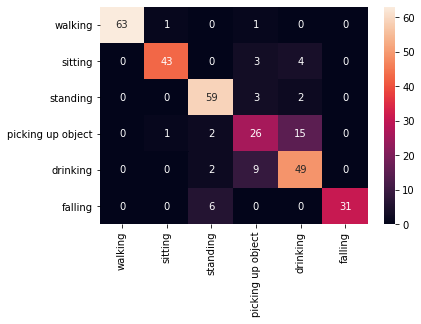

Testing accuracy: 84.69%


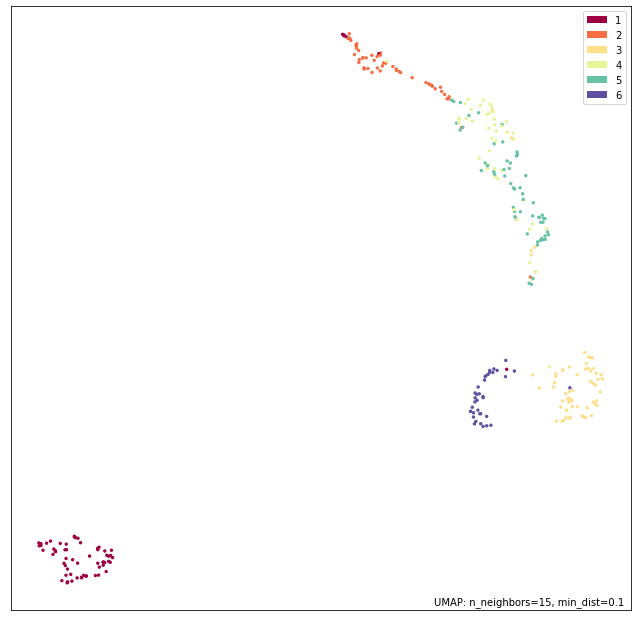

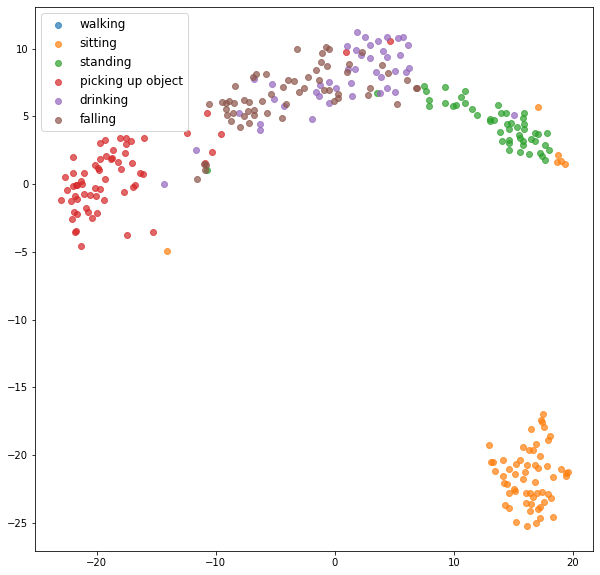

      lr  weight decay optimizer loss function  accuracy       type
0  0.001          0.05       SGD  CrossEntropy  0.893750        raw
1  0.002          0.05       SGD  CrossEntropy  0.853125        raw
2  0.001          0.05      Adam  CrossEntropy  0.818750        raw
3  0.002          0.05      Adam  CrossEntropy  0.371875        raw
4  0.001          0.05       SGD  CrossEntropy  0.887500  augmented
5  0.002          0.05       SGD  CrossEntropy  0.896875  augmented
6  0.001          0.05      Adam  CrossEntropy  0.846875  augmented


In [18]:
#CNN Model 3

learning_rate = 0.001
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.Adam(neuralNetwork3.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_augmentation = train_model(model=neuralNetwork3, dataloader_train=train_dataloader_augmented, 
                            dataloader_valid=valid_dataloader_augmented, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=3)
        
#Finding the accuracy of the model
scores_cnn_augmentation = predictions(model=model_augmentation, test_dataloader=test_dataloader_augmented, num=3)

df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "Adam",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_augmentation.item()/100,
    "type": "augmented"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

torch.save(model_augmentation.state_dict(), "CNN Models/cnn_augmentation3.h5")


Epoch: 1 | Execution time: 13min : 40sec
Training loss: 21.41164 | Validation loss: 2.63565
Training accuracy: 20.61 | Validation accuracy: 23.44


Epoch: 2 | Execution time: 10min : 52sec
Training loss: 2.03055 | Validation loss: 1.43829
Training accuracy: 25.10 | Validation accuracy: 38.67


Epoch: 3 | Execution time: 8min : 54sec
Training loss: 1.68610 | Validation loss: 1.51563
Training accuracy: 30.86 | Validation accuracy: 31.25


Epoch: 4 | Execution time: 10min : 15sec
Training loss: 1.47708 | Validation loss: 1.35302
Training accuracy: 37.01 | Validation accuracy: 41.80


Epoch: 5 | Execution time: 12min : 38sec
Training loss: 1.39454 | Validation loss: 1.27278
Training accuracy: 40.62 | Validation accuracy: 39.06


Epoch: 6 | Execution time: 11min : 0sec
Training loss: 1.33907 | Validation loss: 1.36435
Training accuracy: 43.95 | Validation accuracy: 32.81


Epoch: 7 | Execution time: 11min : 28sec
Training loss: 1.22617 | Validation loss: 1.04169
Training accuracy: 48.93 | V

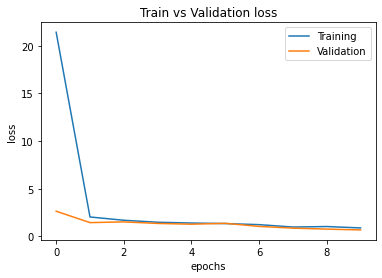

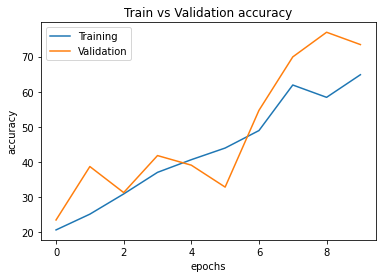

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


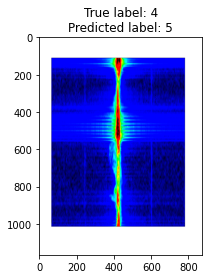

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


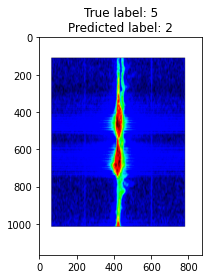

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


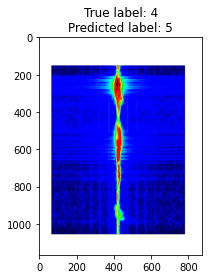

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


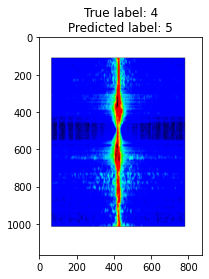

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


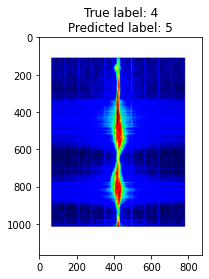

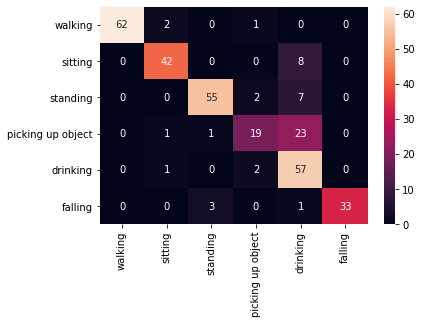

Testing accuracy: 83.75%


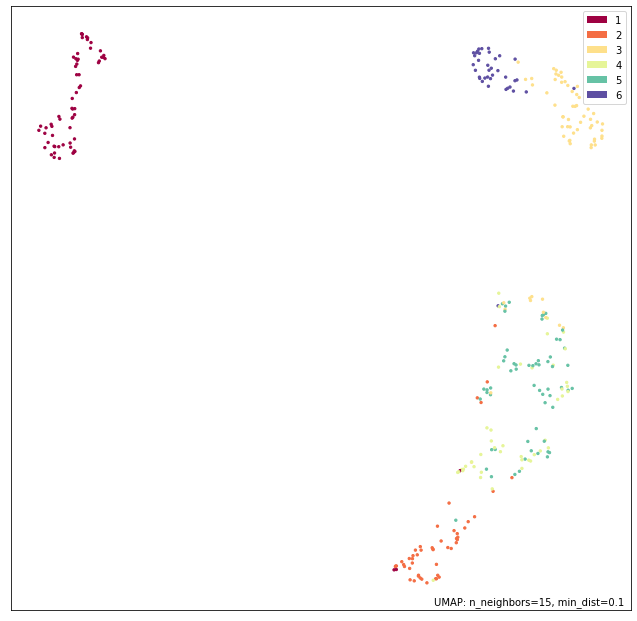

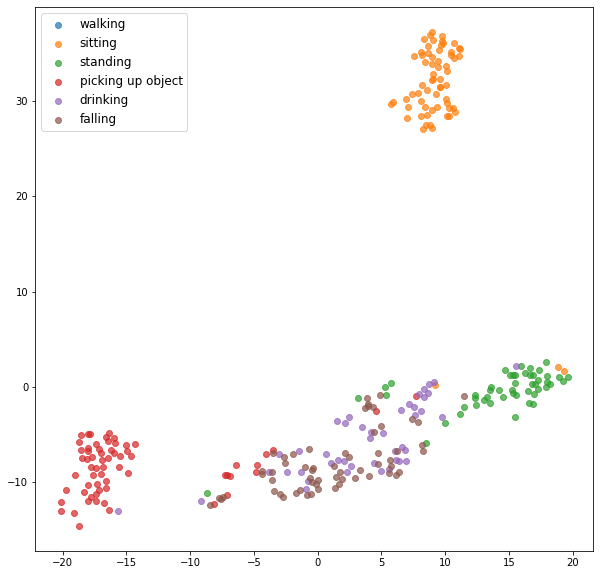

      lr  weight decay optimizer loss function  accuracy       type
0  0.001          0.05       SGD  CrossEntropy  0.893750        raw
1  0.002          0.05       SGD  CrossEntropy  0.853125        raw
2  0.001          0.05      Adam  CrossEntropy  0.818750        raw
3  0.002          0.05      Adam  CrossEntropy  0.371875        raw
4  0.001          0.05       SGD  CrossEntropy  0.887500  augmented
5  0.002          0.05       SGD  CrossEntropy  0.896875  augmented
6  0.001          0.05      Adam  CrossEntropy  0.846875  augmented
7  0.002          0.05      Adam  CrossEntropy  0.837500  augmented


In [19]:
#CNN Model 4

learning_rate = 0.002
weight_decay = 0.05
momentum = 0.9
n_epochs=10


optimizer = optim.Adam(neuralNetwork4.parameters(), lr=learning_rate, weight_decay=weight_decay)
loss_function = nn.CrossEntropyLoss()
        
#Calling the function to train the model
model_augmentation = train_model(model=neuralNetwork4, dataloader_train=train_dataloader_augmented, 
                            dataloader_valid=valid_dataloader_augmented, optimizer=optimizer, 
                            criterion=loss_function, n_epochs=n_epochs, num=4)
        
#Finding the accuracy of the model
scores_cnn_augmentation = predictions(model=model_augmentation, test_dataloader=test_dataloader_augmented, num=4)

df = pd.read_csv('CNN models.csv')
net = pd.DataFrame(data={
    "lr": learning_rate,
    "weight decay": weight_decay,
    "optimizer": "Adam",
    "loss function": "CrossEntropy",
    "accuracy": scores_cnn_augmentation.item()/100,
    "type": "augmented"
}, index=[0])

df = df.append(net, ignore_index=True)
print(df)

df.to_csv('CNN models.csv', index=False)

torch.save(model_augmentation.state_dict(), "CNN Models/cnn_augmentation4.h5")

# Feature Extraction using SelectKBest

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
img_selk = SelectKBest(chi2, k=300000).fit(image_data, labels)

In [8]:
img_selk_data = img_selk.transform(image_data)

In [9]:
img_selk_data.shape

(1600, 300000)

In [10]:
from sklearn.model_selection import train_test_split

x_train_kbest, x_test_kbest, y_train_kbest, y_test_kbest = train_test_split(img_selk_data, labels, test_size=0.2, random_state=123)
print(x_train_kbest.shape, x_test_kbest.shape, y_train_kbest.shape, y_test_kbest.shape)

(1280, 300000) (320, 300000) (1280,) (320,)


In [42]:
from random_forest_models import *

In [43]:
random_forest_model = random_forest_feature_ext_train(x_train_kbest, y_train_kbest)

In [44]:
y_pred_rf_kbest = random_forest_model.predict(x_test_kbest)

In [45]:
confusion_matrix(y_pred_rf_kbest, y_test_kbest)

array([[54,  0,  2,  1,  0,  0],
       [ 0, 42,  1,  0,  0,  0],
       [ 0,  1, 55,  1,  1,  4],
       [ 0,  2,  3, 44,  8,  0],
       [ 0,  2,  3,  7, 48,  3],
       [ 0,  0,  0,  0,  0, 38]])

In [46]:
score_rf_kbest = accuracy_score(y_pred_rf_kbest, y_test_kbest)
score_rf_kbest

0.878125

In [47]:
report_rf_feature_ext = classification_report(y_test_kbest, y_pred_rf_kbest, output_dict=True)
df = pd.DataFrame(report_rf_feature_ext)
df.to_csv('Model Reports/Random_Forest_Feature_ext.csv')

df

1          2          3          4          5          6  \
precision   0.947368   0.976744   0.887097   0.771930   0.761905   1.000000   
recall      1.000000   0.893617   0.859375   0.830189   0.842105   0.844444   
f1-score    0.972973   0.933333   0.873016   0.800000   0.800000   0.915663   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision  0.878125    0.890841      0.884937  
recall     0.878125    0.878288      0.878125  
f1-score   0.878125    0.882497      0.879641  
support    0.878125  320.000000    320.000000

In [56]:
df = pd.read_csv('Accuracy.csv')
df

Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
6         Random Forest  0.868750  Feature Extracted
7  Gaussian Naive Bayes  0.534375  Feature Extracted
8                   KNN  0.800000  Feature Extracted
9         Random Forest  0.878125  Feature Extracted

In [57]:
df = df.drop([6,7,8], axis=0)

In [58]:
df

Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
9         Random Forest  0.878125  Feature Extracted

In [59]:
df = df.to_csv('Accuracy.csv', index=False)

In [60]:
df = pd.read_csv('Accuracy.csv')
rf = pd.DataFrame(data={
    "Model": "Random Forest",
    "Accuracy": score_rf_kbest,
    "Type": "Feature Extracted"
}, index=[0])

df = df.append(rf, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
6         Random Forest  0.878125  Feature Extracted
7         Random Forest  0.878125  Feature Extracted


In [61]:
df = df.drop([7], axis=0)
print(df)
df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
6         Random Forest  0.878125  Feature Extracted


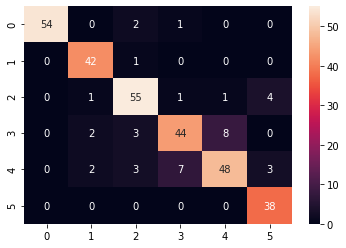

<Figure size 432x288 with 0 Axes>

In [62]:
sns.heatmap(confusion_matrix(y_pred_rf_kbest, y_test_kbest), annot=True)
plt.show()
plt.savefig(fname='Model Images/random_forest_feature_ext.png')

Gaussian Naive Bayes

In [63]:
from gaussian_nb_models import *

In [64]:
gaussian_nb_model = gaussian_nb_feature_ext_train(x_train_kbest, y_train_kbest)

In [65]:
y_pred_gnb_kbest = gaussian_nb_model.predict(x_test_kbest)

In [66]:
confusion_matrix(y_pred_gnb_kbest, y_test_kbest)

array([[50,  0,  2,  5,  1,  0],
       [ 0, 30, 16, 14, 14,  0],
       [ 0,  1, 18,  3,  1,  3],
       [ 3,  2,  7, 13,  4,  2],
       [ 1,  5,  7, 10, 24,  4],
       [ 0,  9, 14,  8, 13, 36]])

In [67]:
score_gnb_kbest = accuracy_score(y_pred_gnb_kbest, y_test_kbest)
score_gnb_kbest

0.534375

In [68]:
report_gnb_feature_ext = classification_report(y_test_kbest, y_pred_gnb_kbest, output_dict=True)
df = pd.DataFrame(report_gnb_feature_ext)
df.to_csv('Model Reports/GaussianNB_Feature_ext.csv')

df

1          2          3          4          5       6  \
precision   0.862069   0.405405   0.692308   0.419355   0.470588   0.450   
recall      0.925926   0.638298   0.281250   0.245283   0.421053   0.800   
f1-score    0.892857   0.495868   0.400000   0.309524   0.444444   0.576   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000   

           accuracy   macro avg  weighted avg  
precision  0.534375    0.549954      0.560040  
recall     0.534375    0.551968      0.534375  
f1-score   0.534375    0.519782      0.514932  
support    0.534375  320.000000    320.000000

In [69]:
df = pd.read_csv('Accuracy.csv')
gnb = pd.DataFrame(data={
    "Model": "Gaussian Naive Bayes",
    "Accuracy": score_gnb_kbest,
    "Type": "Feature Extracted"
}, index=[0])

df = df.append(gnb, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
6         Random Forest  0.878125  Feature Extracted
7  Gaussian Naive Bayes  0.534375  Feature Extracted


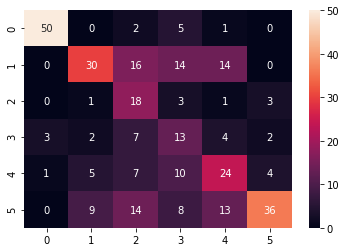

<Figure size 432x288 with 0 Axes>

In [70]:
sns.heatmap(confusion_matrix(y_pred_gnb_kbest, y_test_kbest), annot=True)
plt.show()
plt.savefig(fname='Model Images/gaussian_nb_feature_ext.png')

KNN 

In [71]:
from knn_models import *

In [72]:
knn_model = knn_feature_ext_train(x_train_kbest, y_train_kbest)

In [73]:
y_pred_knn_kbest = knn_model.predict(x_test_kbest)

In [74]:
confusion_matrix(y_pred_knn_kbest, y_test_kbest)

array([[52,  0,  1,  0,  0,  0],
       [ 2, 42,  2,  4,  5,  1],
       [ 0,  0, 51,  3,  6,  7],
       [ 0,  2,  5, 39,  7,  0],
       [ 0,  3,  5,  7, 39,  4],
       [ 0,  0,  0,  0,  0, 33]])

In [75]:
score_knn_kbest = accuracy_score(y_pred_knn_kbest, y_test_kbest)
score_knn_kbest

0.8

In [76]:
report_knn_feature_ext = classification_report(y_test_kbest, y_pred_knn_kbest, output_dict=True)
df = pd.DataFrame(report_knn_feature_ext)
df.to_csv('Model Reports/KNN_Feature_ext.csv')

df

1          2          3          4          5          6  \
precision   0.981132   0.750000   0.761194   0.735849   0.672414   1.000000   
recall      0.962963   0.893617   0.796875   0.735849   0.684211   0.733333   
f1-score    0.971963   0.815534   0.778626   0.735849   0.678261   0.846154   
support    54.000000  47.000000  64.000000  53.000000  57.000000  45.000000   

           accuracy   macro avg  weighted avg  
precision       0.8    0.816765      0.810235  
recall          0.8    0.801141      0.800000  
f1-score        0.8    0.804398      0.801206  
support         0.8  320.000000    320.000000

In [77]:
df = pd.read_csv('Accuracy.csv')
knn = pd.DataFrame(data={
    "Model": "KNN",
    "Accuracy": score_knn_kbest,
    "Type": "Feature Extracted"
}, index=[0])

df = df.append(knn, ignore_index=True)
print(df)

df.to_csv('Accuracy.csv', index=False)

                  Model  Accuracy               Type
0         Random Forest  0.881250                Raw
1  Gaussian Naive Bayes  0.487500                Raw
2                   KNN  0.812500                Raw
3         Random Forest  0.856250          Augmented
4  Gaussian Naive Bayes  0.628125          Augmented
5                   KNN  0.840625          Augmented
6         Random Forest  0.878125  Feature Extracted
7  Gaussian Naive Bayes  0.534375  Feature Extracted
8                   KNN  0.800000  Feature Extracted


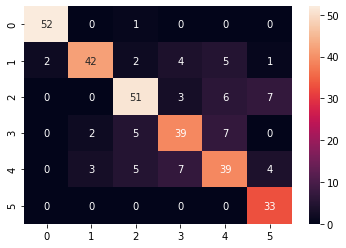

<Figure size 432x288 with 0 Axes>

In [78]:
sns.heatmap(confusion_matrix(y_pred_knn_kbest, y_test_kbest), annot=True)
plt.show()
plt.savefig(fname='Model Images/knn_feature_ext.png')

Using inverse transformation to bring the original data back

In [11]:
x_new = img_selk.inverse_transform(x_train_kbest)

In [12]:
x_new_test = img_selk.inverse_transform(x_test_kbest)

In [16]:
img = x_new[0].reshape(shape)

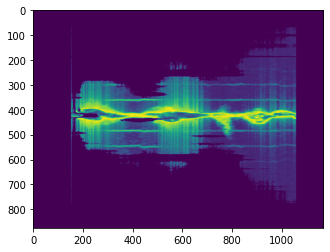

In [17]:
plt.imshow(img)

In [18]:
from PIL import Image

In [19]:
img_rgb = Image.fromarray(np.uint8(img)).convert('RGB')

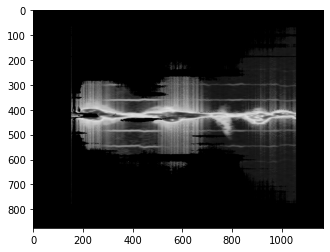

In [20]:
plt.imshow(img_rgb)